In [ ]:
!pip install qutip

In [1]:
import qutip as qt
import numpy as np
from numpy import arange
import scipy as sp
from scipy import stats
import math
from scipy.integrate import odeint
from mpl_toolkits import mplot3d
from matplotlib import cm
from numpy import linalg as npla
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate
from numba import jit
from matplotlib.ticker import LinearLocator
from matplotlib.backends.backend_pdf import PdfPages
def truncate(n):
    return int(n*100)/100

import matplotlib.pylab as plt
import matplotlib
par=20
par2=30
plt.rcParams['font.size'] = par
# Set the default text font size
plt.rc('font', size=par)
# Set the axes title font size
plt.rc('axes', titlesize=par2)
# Set the axes labels font size
plt.rc('axes', labelsize=par2)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=par)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=par)
# Set the legend font size
plt.rc('legend', fontsize=par)
# Set the font size of the figure title
plt.rc('figure', titlesize=par)

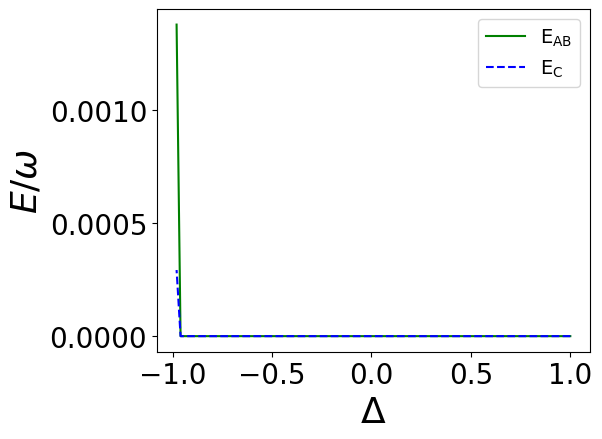

In [3]:
#A: Charger
#C: Cavity
#B: Battery

def eigenvalues(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenValues
    
def eigenvectors(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenVectors

def trace_A(rho):
    """Partial trace over the TLS degrees of freedom"""
    rho_q = np.zeros(shape=(2, 2), dtype=np.complex_)
    rho_q[0, 0] = rho[0, 0] + rho[2, 2]
    rho_q[0, 1] = rho[0, 1] + rho[2, 3]
    rho_q[1, 0] = rho[1, 0] + rho[3, 2]
    rho_q[1, 1] = rho[1, 1] + rho[3, 3]
    return qt.Qobj(rho_q)


def H1_coeff(t, args):
      return  np.exp(-(t*1j*omega))
def H2_coeff(t, args):
      return  np.exp(t*1j*omega)

N=8
gamma=0.05
kappa=0.01
omega=1
gac=0.1*omega
gbc=0.1*omega
gab=0.5*omega
F=0.05*omega
Nb=0
s = 100
omega_max = 2
W_f = np.linspace(0, omega_max, s)
Delta = np.zeros(len(W_f))
Energy_0 = np.zeros(len(W_f))
Ergotropy_0 = np.zeros(len(W_f))
Energy_1 = np.zeros(len(W_f))
Ergotropy_1 = np.zeros(len(W_f))
Energy_21 = np.zeros(len(W_f))
Ergotropy_21 = np.zeros(len(W_f))
Energy_31 = np.zeros(len(W_f))
Ergotropy_31 = np.zeros(len(W_f))

for k in range (len(W_f)):
    omega_f = k*(omega_max)/s
    Delta[k] = omega - omega_f
    
def H1_coeff(t, args):
    return  np.exp(-(t*1j*(omega_f)))

def H2_coeff(t, args):
    return  np.exp(t*1j*(omega_f))
    

HA = omega*qt.create(2)*qt.destroy(2)
HC = omega*qt.create(N)*qt.destroy(N)
HB = omega*qt.create(2)*qt.destroy(2)
#HL = omega*qt.tensor(HC, qt.qeye(N)) + omega*qt.tensor(qt.qeye(2), HB)


HAC = gac*(qt.tensor(qt.create(2), qt.destroy(N), qt.qeye(2)) + qt.tensor(qt.destroy(2), qt.create(N), qt.qeye(2)))
HBC = gbc*(qt.tensor(qt.qeye(2), qt.create(N), qt.destroy(2)) + qt.tensor(qt.qeye(2), qt.destroy(N), qt.create(2)))
HAB = gab*(qt.tensor(qt.create(2), qt.qeye(N), qt.destroy(2)) + qt.tensor(qt.destroy(2), qt.qeye(N), qt.create(2)))
HAplusB = qt.tensor(HA, qt.qeye(2)) + qt.tensor(qt.qeye(2), HB) + gab*(qt.tensor(qt.create(2), qt.destroy(2)) + qt.tensor(qt.destroy(2), qt.create(2)))
H1 = qt.tensor(qt.qeye(2), F*qt.create(N), qt.qeye(2))
H2 = qt.tensor(qt.qeye(2), F*qt.destroy(N), qt.qeye(2))

H0 = qt.tensor(HA, qt.qeye(N), qt.qeye(2)) +qt.tensor(qt.qeye(2), HC, qt.qeye(2)) + qt.tensor(qt.qeye(2), qt.qeye(N), HB) + HAC + HBC+ HAB
H = [H0, [H1, H1_coeff], [H2, H2_coeff]]

t = np.linspace(0, 25, 10000)
psi0 = qt.tensor(qt.basis(2,0), qt.basis(N,0), qt.basis(2,0))
output = qt.mesolve(H, psi0, t, [qt.tensor(np.sqrt(gamma*omega*(Nb+1))*qt.destroy(2), qt.qeye(N), qt.qeye(2)), qt.tensor(np.sqrt(gamma*omega*Nb)*qt.create(2), qt.qeye(N), qt.qeye(2)), qt.tensor(qt.qeye(2), np.sqrt(kappa*omega*(Nb+1))*qt.destroy(N), qt.qeye(2)), qt.tensor(qt.qeye(2), np.sqrt(kappa*omega*Nb)*qt.create(N), qt.qeye(2)), qt.tensor(qt.qeye(2), qt.qeye(N), np.sqrt(gamma*omega*(Nb+1))*qt.destroy(2)), qt.tensor(qt.qeye(2), qt.qeye(N), np.sqrt(gamma*omega*Nb)*qt.create(2))], [])

Energy=np.zeros(10000)
Ergotropy=np.zeros(10000)
Energy1=np.zeros(10000)
Ergotropy1=np.zeros(10000)
Energy2=np.zeros(10000)
Ergotropy2=np.zeros(10000)
Energy3=np.zeros(10000)
Ergotropy3=np.zeros(10000)
v=eigenvectors(HA)
v1=eigenvectors(HB)
v2=eigenvectors(HC)
v3=eigenvectors(HAplusB)


for i in range(0, 10000):
    A=np.array(output.states[i])
    FinalRhoAB=np.trace(A.reshape(2, N, 2, 2, N, 2), axis1=1, axis2=4)
    FinalRhoAB=FinalRhoAB.reshape(2*2, 2*2)
    FinalRhoA=np.trace(FinalRhoAB.reshape(2, 2, 2, 2), axis1=1, axis2=3)
    FinalRhoA=FinalRhoA.reshape(2, 2)
    FinalRhoBC=np.trace(A.reshape(2, N, 2, 2, N, 2), axis1=0, axis2=3)
    FinalRhoBC=FinalRhoBC.reshape(N*2, N*2)
    FinalRhoB=np.trace(FinalRhoBC.reshape(N, 2, N, 2), axis1=0, axis2=2)
    FinalRhoB=FinalRhoB.reshape(2, 2)
    FinalRhoC=np.trace(FinalRhoBC.reshape(N, 2, N, 2), axis1=1, axis2=3)
    FinalRhoC=FinalRhoC.reshape(N, N)


Rho_f=np.zeros((2, 2))
for j in range(0, 2):
    Rho_f=np.array(eigenvalues(FinalRhoA)[2-1-j]*qt.Qobj(v[:, j])*qt.Qobj(v[:, j]).dag()) + Rho_f
    Energy[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HA), FinalRhoA)))
    Ergotropy[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HA),(Rho_f - FinalRhoA)))) 
    Energy_0[k] = Energy[-1]
    Ergotropy_0[k] = Ergotropy[-1]

Rho_f=np.zeros((2, 2))
for j in range(0, 2):
    Rho_f=np.array(eigenvalues(FinalRhoB)[2-1-j]*qt.Qobj(v1[:,j])*qt.Qobj(v1[:, j]).dag()) + Rho_f
    Energy1[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HB), FinalRhoB)))
    Ergotropy1[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HB),(Rho_f - FinalRhoB)))) 
    Energy_1[k] = Energy[-1]
    Ergotropy_1[k] = Ergotropy[-1]
    
Rho_f=np.zeros((N, N))
for j in range(0, N):
    Rho_f=np.array(eigenvalues(FinalRhoC)[N-1-j]*qt.Qobj(v2[:, j])*qt.Qobj(v2[:, j]).dag()) + Rho_f
    Energy2[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HC), FinalRhoC)))
    Ergotropy2[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HC), (Rho_f-FinalRhoC))))
    Energy_21[k] = Energy2[-1]
    Ergotropy_21[k] = Ergotropy2[-1]
    
    
Rho_f=np.zeros((2*2, 2*2))
                    
for j in range(0, 2*2):
    Rho_f=np.array(eigenvalues(FinalRhoAB)[2*2-1-j]*qt.Qobj(v3[:, j])*qt.Qobj(v3[:, j]).dag()) + Rho_f
    Energy3[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HAplusB), FinalRhoAB)))
    Ergotropy3[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HAplusB),(Rho_f - FinalRhoAB)))) 
    Energy_31[k] = Energy3[-1]
    Ergotropy_31[k] = Ergotropy3[-1]   


fig3, axs = plt.subplots()
plt.plot(Delta, Energy_31, color='green', label = "$\mathregular{E_{AB}}$")
plt.plot(Delta, Energy_21, ls='dashed', color='blue', label = "$\mathregular{E_{C}}$")
plt.ylabel("$E/\omega$", fontsize=26)
plt.xlabel("$\Delta$", fontsize=26)
plt.legend(loc="upper right", fontsize=14)
plt.tight_layout()
plt.savefig("EnergyABCvsDelta-kappa=0.01.pdf", format='pdf')

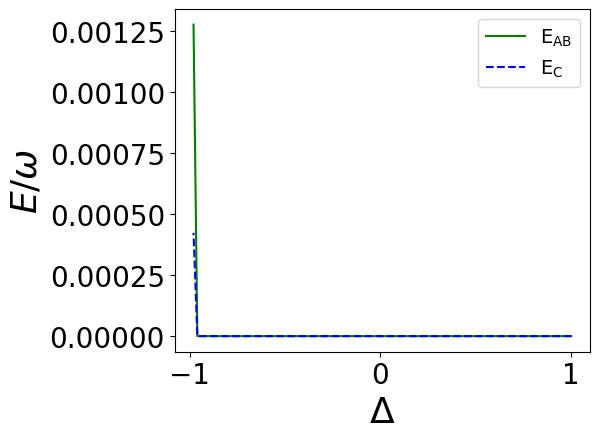

In [4]:
#A: Charger
#C: Cavity
#B: Battery

def eigenvalues(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenValues
    
def eigenvectors(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenVectors

def trace_A(rho):
    """Partial trace over the TLS degrees of freedom"""
    rho_q = np.zeros(shape=(2, 2), dtype=np.complex_)
    rho_q[0, 0] = rho[0, 0] + rho[2, 2]
    rho_q[0, 1] = rho[0, 1] + rho[2, 3]
    rho_q[1, 0] = rho[1, 0] + rho[3, 2]
    rho_q[1, 1] = rho[1, 1] + rho[3, 3]
    return qt.Qobj(rho_q)


def H1_coeff(t, args):
      return  np.exp(-(t*1j*omega))
def H2_coeff(t, args):
      return  np.exp(t*1j*omega)

N=8
gamma=0.05
kappa=0.02
omega=1
gac=0.1*omega
gbc=0.1*omega
gab=0.5*omega
F=0.05*omega
Nb=0
s = 100
omega_max = 2
W_f = np.linspace(0, omega_max, s)
Delta = np.zeros(len(W_f))
Energy_0 = np.zeros(len(W_f))
Ergotropy_0 = np.zeros(len(W_f))
Energy_1 = np.zeros(len(W_f))
Ergotropy_1 = np.zeros(len(W_f))
Energy_22 = np.zeros(len(W_f))
Ergotropy_22 = np.zeros(len(W_f))
Energy_32 = np.zeros(len(W_f))
Ergotropy_32 = np.zeros(len(W_f))

for k in range (len(W_f)):
    omega_f = k*(omega_max)/s
    Delta[k] = omega - omega_f

def H1_coeff(t, args):
    return  np.exp(-(t*1j*(omega_f)))

def H2_coeff(t, args):
    return  np.exp(t*1j*(omega_f))

HA = omega*qt.create(2)*qt.destroy(2)
HC = omega*qt.create(N)*qt.destroy(N)
HB = omega*qt.create(2)*qt.destroy(2)
#HL = omega*qt.tensor(HC, qt.qeye(N)) + omega*qt.tensor(qt.qeye(2), HB)

HAC = gac*(qt.tensor(qt.create(2), qt.destroy(N), qt.qeye(2)) + qt.tensor(qt.destroy(2), qt.create(N), qt.qeye(2)))
HBC = gbc*(qt.tensor(qt.qeye(2), qt.create(N), qt.destroy(2)) + qt.tensor(qt.qeye(2), qt.destroy(N), qt.create(2)))
HAB = gab*(qt.tensor(qt.create(2), qt.qeye(N), qt.destroy(2)) + qt.tensor(qt.destroy(2), qt.qeye(N), qt.create(2)))
HAplusB = qt.tensor(HA, qt.qeye(2)) + qt.tensor(qt.qeye(2), HB) + gab*(qt.tensor(qt.create(2), qt.destroy(2)) + qt.tensor(qt.destroy(2), qt.create(2)))
H1 = qt.tensor(qt.qeye(2), F*qt.create(N), qt.qeye(2))
H2 = qt.tensor(qt.qeye(2), F*qt.destroy(N), qt.qeye(2))

H0 = qt.tensor(HA, qt.qeye(N), qt.qeye(2)) +qt.tensor(qt.qeye(2), HC, qt.qeye(2)) + qt.tensor(qt.qeye(2), qt.qeye(N), HB) + HAC + HBC + HAB
H = [H0, [H1, H1_coeff], [H2, H2_coeff]]

t = np.linspace(0, 25, 10000)
psi0 = qt.tensor(qt.basis(2,0), qt.basis(N,0), qt.basis(2,0))
output = qt.mesolve(H, psi0, t, [qt.tensor(np.sqrt(gamma*omega*(Nb+1))*qt.destroy(2), qt.qeye(N), qt.qeye(2)), qt.tensor(np.sqrt(gamma*omega*Nb)*qt.create(2), qt.qeye(N), qt.qeye(2)), qt.tensor(qt.qeye(2), np.sqrt(kappa*omega*(Nb+1))*qt.destroy(N), qt.qeye(2)), qt.tensor(qt.qeye(2), np.sqrt(kappa*omega*Nb)*qt.create(N), qt.qeye(2)), qt.tensor(qt.qeye(2), qt.qeye(N), np.sqrt(gamma*omega*(Nb+1))*qt.destroy(2)), qt.tensor(qt.qeye(2), qt.qeye(N), np.sqrt(gamma*omega*Nb)*qt.create(2))], [])

Energy=np.zeros(10000)
Ergotropy=np.zeros(10000)
Energy1=np.zeros(10000)
Ergotropy1=np.zeros(10000)
Energy2=np.zeros(10000)
Ergotropy2=np.zeros(10000)
Energy3=np.zeros(10000)
Ergotropy3=np.zeros(10000)
v=eigenvectors(HA)
v1=eigenvectors(HB)
v2=eigenvectors(HC)
v3=eigenvectors(HAplusB)


for i in range(0, 10000):
    A=np.array(output.states[i])
    FinalRhoAB=np.trace(A.reshape(2, N, 2, 2, N, 2), axis1=1, axis2=4)
    FinalRhoAB=FinalRhoAB.reshape(2*2, 2*2)
    FinalRhoA=np.trace(FinalRhoAB.reshape(2, 2, 2, 2), axis1=1, axis2=3)
    FinalRhoA=FinalRhoA.reshape(2, 2)
    FinalRhoBC=np.trace(A.reshape(2, N, 2, 2, N, 2), axis1=0, axis2=3)
    FinalRhoBC=FinalRhoBC.reshape(N*2, N*2)
    FinalRhoB=np.trace(FinalRhoBC.reshape(N, 2, N, 2), axis1=0, axis2=2)
    FinalRhoB=FinalRhoB.reshape(2, 2)
    FinalRhoC=np.trace(FinalRhoBC.reshape(N, 2, N, 2), axis1=1, axis2=3)
    FinalRhoC=FinalRhoC.reshape(N, N)


Rho_f=np.zeros((2, 2))
for j in range(0, 2):
    Rho_f=np.array(eigenvalues(FinalRhoA)[2-1-j]*qt.Qobj(v[:, j])*qt.Qobj(v[:, j]).dag()) + Rho_f
    Energy[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HA), FinalRhoA)))
    Ergotropy[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HA),(Rho_f - FinalRhoA)))) 
    Energy_0[k] = Energy[-1]
    Ergotropy_0[k] = Ergotropy[-1]

Rho_f=np.zeros((2, 2))
for j in range(0, 2):
    Rho_f=np.array(eigenvalues(FinalRhoB)[2-1-j]*qt.Qobj(v1[:,j])*qt.Qobj(v1[:, j]).dag()) + Rho_f
    Energy1[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HB), FinalRhoB)))
    Ergotropy1[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HB),(Rho_f - FinalRhoB)))) 
    Energy_1[k] = Energy[-1]
    Ergotropy_1[k] = Ergotropy[-1]

Rho_f=np.zeros((N, N))
for j in range(0, N):
    Rho_f=np.array(eigenvalues(FinalRhoC)[N-1-j]*qt.Qobj(v2[:, j])*qt.Qobj(v2[:, j]).dag()) + Rho_f
    Energy2[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HC), FinalRhoC)))
    Ergotropy2[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HC), (Rho_f-FinalRhoC))))
    Energy_22[k] = Energy2[-1]
    Ergotropy_22[k] = Ergotropy2[-1]
    
Rho_f=np.zeros((2*2, 2*2))
for j in range(0, 2*2):
    Rho_f=np.array(eigenvalues(FinalRhoAB)[2*2-1-j]*qt.Qobj(v3[:, j])*qt.Qobj(v3[:, j]).dag()) + Rho_f
    Energy3[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HAplusB), FinalRhoAB)))
    Ergotropy3[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HAplusB),(Rho_f - FinalRhoAB)))) 
    Energy_32[k] = Energy3[-1]
    Ergotropy_32[k] = Ergotropy3[-1]


fig3, axs = plt.subplots()
plt.plot(Delta, Energy_32, color='green', label = "$\mathregular{E_{AB}}$")
plt.plot(Delta, Energy_22, ls='dashed', color='blue', label = "$\mathregular{E_{C}}$")
plt.ylabel("$E/\omega$", fontsize=26)
plt.xlabel("$\Delta$", fontsize=26)
plt.legend(loc="upper right", fontsize=14)
plt.tight_layout()
plt.savefig("EnergyABCvsDelta-kappa=0.02.pdf", format='pdf')

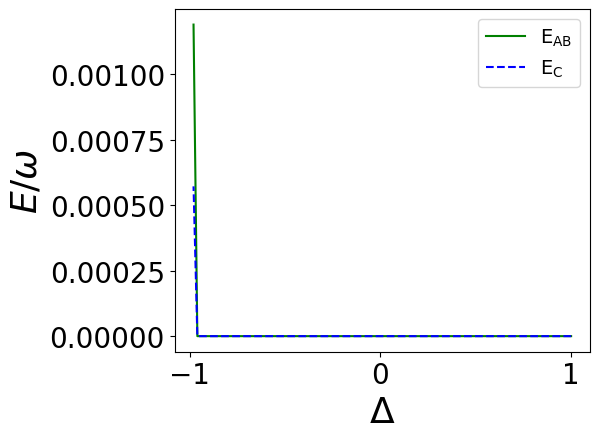

In [5]:

#A: Charger
#C: Cavity
#B: Battery

def eigenvalues(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenValues
    
def eigenvectors(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenVectors

def trace_A(rho):
    """Partial trace over the TLS degrees of freedom"""
    rho_q = np.zeros(shape=(2, 2), dtype=np.complex_)
    rho_q[0, 0] = rho[0, 0] + rho[2, 2]
    rho_q[0, 1] = rho[0, 1] + rho[2, 3]
    rho_q[1, 0] = rho[1, 0] + rho[3, 2]
    rho_q[1, 1] = rho[1, 1] + rho[3, 3]
    return qt.Qobj(rho_q)


def H1_coeff(t, args):
      return  np.exp(-(t*1j*omega))
def H2_coeff(t, args):
      return  np.exp(t*1j*omega)

N=8
gamma=0.05
kappa=0.03
omega=1
gac=0.1*omega
gbc=0.1*omega
gab=0.5*omega
F=0.05*omega
Nb=0
s = 100
omega_max = 2
W_f = np.linspace(0, omega_max, s)
Delta = np.zeros(len(W_f))
Energy_0 = np.zeros(len(W_f))
Ergotropy_0 = np.zeros(len(W_f))
Energy_1 = np.zeros(len(W_f))
Ergotropy_1 = np.zeros(len(W_f))
Energy_23 = np.zeros(len(W_f))
Ergotropy_23 = np.zeros(len(W_f))
Energy_33 = np.zeros(len(W_f))
Ergotropy_33 = np.zeros(len(W_f))

for k in range (len(W_f)):
    omega_f = k*(omega_max)/s
    Delta[k] = omega - omega_f

def H1_coeff(t, args):
    return  np.exp(-(t*1j*(omega_f)))

def H2_coeff(t, args):
    return  np.exp(t*1j*(omega_f))

HA = omega*qt.create(2)*qt.destroy(2)
HC = omega*qt.create(N)*qt.destroy(N)
HB = omega*qt.create(2)*qt.destroy(2)
#HL = omega*qt.tensor(HC, qt.qeye(N)) + omega*qt.tensor(qt.qeye(2), HB)

HAC = gac*(qt.tensor(qt.create(2), qt.destroy(N), qt.qeye(2)) + qt.tensor(qt.destroy(2), qt.create(N), qt.qeye(2)))
HBC = gbc*(qt.tensor(qt.qeye(2), qt.create(N), qt.destroy(2)) + qt.tensor(qt.qeye(2), qt.destroy(N), qt.create(2)))
HAB = gab*(qt.tensor(qt.create(2), qt.qeye(N), qt.destroy(2)) + qt.tensor(qt.destroy(2), qt.qeye(N), qt.create(2)))
HAplusB = qt.tensor(HA, qt.qeye(2)) + qt.tensor(qt.qeye(2), HB) + gab*(qt.tensor(qt.create(2), qt.destroy(2)) + qt.tensor(qt.destroy(2), qt.create(2)))
H1 = qt.tensor(qt.qeye(2), F*qt.create(N), qt.qeye(2))
H2 = qt.tensor(qt.qeye(2), F*qt.destroy(N), qt.qeye(2))

H0 = qt.tensor(HA, qt.qeye(N), qt.qeye(2)) +qt.tensor(qt.qeye(2), HC, qt.qeye(2)) + qt.tensor(qt.qeye(2), qt.qeye(N), HB) + HAC + HBC + HAB
H = [H0, [H1, H1_coeff], [H2, H2_coeff]]

t = np.linspace(0, 25, 10000)
psi0 = qt.tensor(qt.basis(2,0), qt.basis(N,0), qt.basis(2,0))
output = qt.mesolve(H, psi0, t, [qt.tensor(np.sqrt(gamma*omega*(Nb+1))*qt.destroy(2), qt.qeye(N), qt.qeye(2)), qt.tensor(np.sqrt(gamma*omega*Nb)*qt.create(2), qt.qeye(N), qt.qeye(2)), qt.tensor(qt.qeye(2), np.sqrt(kappa*omega*(Nb+1))*qt.destroy(N), qt.qeye(2)), qt.tensor(qt.qeye(2), np.sqrt(kappa*omega*Nb)*qt.create(N), qt.qeye(2)), qt.tensor(qt.qeye(2), qt.qeye(N), np.sqrt(gamma*omega*(Nb+1))*qt.destroy(2)), qt.tensor(qt.qeye(2), qt.qeye(N), np.sqrt(gamma*omega*Nb)*qt.create(2))], [])

Energy=np.zeros(10000)
Ergotropy=np.zeros(10000)
Energy1=np.zeros(10000)
Ergotropy1=np.zeros(10000)
Energy2=np.zeros(10000)
Ergotropy2=np.zeros(10000)
Energy3=np.zeros(10000)
Ergotropy3=np.zeros(10000)
v=eigenvectors(HA)
v1=eigenvectors(HB)
v2=eigenvectors(HC)
v3=eigenvectors(HAplusB)


for i in range(0, 10000):
    A=np.array(output.states[i])
    FinalRhoAB=np.trace(A.reshape(2, N, 2, 2, N, 2), axis1=1, axis2=4)
    FinalRhoAB=FinalRhoAB.reshape(2*2, 2*2)
    FinalRhoA=np.trace(FinalRhoAB.reshape(2, 2, 2, 2), axis1=1, axis2=3)
    FinalRhoA=FinalRhoA.reshape(2, 2)
    FinalRhoBC=np.trace(A.reshape(2, N, 2, 2, N, 2), axis1=0, axis2=3)
    FinalRhoBC=FinalRhoBC.reshape(N*2, N*2)
    FinalRhoB=np.trace(FinalRhoBC.reshape(N, 2, N, 2), axis1=0, axis2=2)
    FinalRhoB=FinalRhoB.reshape(2, 2)
    FinalRhoC=np.trace(FinalRhoBC.reshape(N, 2, N, 2), axis1=1, axis2=3)
    FinalRhoC=FinalRhoC.reshape(N, N)


Rho_f=np.zeros((2, 2))
for j in range(0, 2):
    Rho_f=np.array(eigenvalues(FinalRhoA)[2-1-j]*qt.Qobj(v[:, j])*qt.Qobj(v[:, j]).dag()) + Rho_f
    Energy[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HA), FinalRhoA)))
    Ergotropy[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HA),(Rho_f - FinalRhoA)))) 
    Energy_0[k] = Energy[-1]
    Ergotropy_0[k] = Ergotropy[-1]

Rho_f=np.zeros((2, 2))
for j in range(0, 2):
    Rho_f=np.array(eigenvalues(FinalRhoB)[2-1-j]*qt.Qobj(v1[:,j])*qt.Qobj(v1[:, j]).dag()) + Rho_f
    Energy1[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HB), FinalRhoB)))
    Ergotropy1[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HB),(Rho_f - FinalRhoB)))) 
    Energy_1[k] = Energy[-1]
    Ergotropy_1[k] = Ergotropy[-1]

Rho_f=np.zeros((N, N))
for j in range(0, N):
    Rho_f=np.array(eigenvalues(FinalRhoC)[N-1-j]*qt.Qobj(v2[:, j])*qt.Qobj(v2[:, j]).dag()) + Rho_f
    Energy2[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HC), FinalRhoC)))
    Ergotropy2[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HC), (Rho_f-FinalRhoC))))
    Energy_23[k] = Energy2[-1]
    Ergotropy_23[k] = Ergotropy2[-1]
    
Rho_f=np.zeros((2*2, 2*2))
for j in range(0, 2*2):
    Rho_f=np.array(eigenvalues(FinalRhoAB)[2*2-1-j]*qt.Qobj(v3[:, j])*qt.Qobj(v3[:, j]).dag()) + Rho_f
    Energy3[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HAplusB), FinalRhoAB)))
    Ergotropy3[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HAplusB),(Rho_f - FinalRhoAB)))) 
    Energy_33[k] = Energy3[-1]
    Ergotropy_33[k] = Ergotropy3[-1]


fig3, axs = plt.subplots()
plt.plot(Delta, Energy_33, color='green', label = "$\mathregular{E_{AB}}$")
plt.plot(Delta, Energy_23, ls='dashed', color='blue', label = "$\mathregular{E_{C}}$")
plt.ylabel("$E/\omega$", fontsize=26)
plt.xlabel("$\Delta$", fontsize=26)
plt.legend(loc="upper right", fontsize=14)
plt.tight_layout()
plt.savefig("EnergyABCvsDelta-kappa=0.03.pdf", format='pdf')

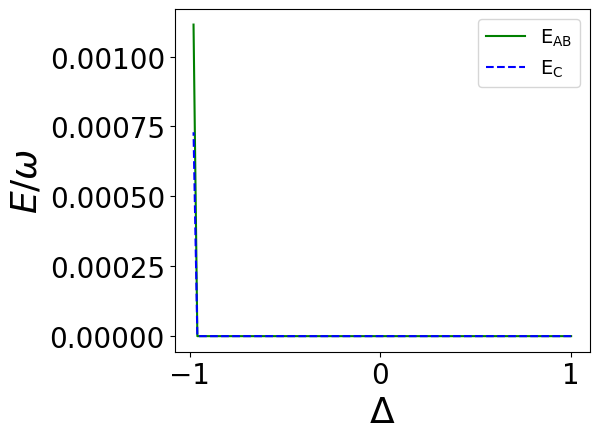

In [6]:

#A: Charger
#C: Cavity
#B: Battery

def eigenvalues(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenValues
    
def eigenvectors(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenVectors

def trace_A(rho):
    """Partial trace over the TLS degrees of freedom"""
    rho_q = np.zeros(shape=(2, 2), dtype=np.complex_)
    rho_q[0, 0] = rho[0, 0] + rho[2, 2]
    rho_q[0, 1] = rho[0, 1] + rho[2, 3]
    rho_q[1, 0] = rho[1, 0] + rho[3, 2]
    rho_q[1, 1] = rho[1, 1] + rho[3, 3]
    return qt.Qobj(rho_q)


def H1_coeff(t, args):
      return  np.exp(-(t*1j*omega))
def H2_coeff(t, args):
      return  np.exp(t*1j*omega)

N=8
gamma=0.05
kappa=0.04
omega=1
gac=0.1*omega
gbc=0.1*omega
gab=0.5*omega
F=0.05*omega
Nb=0
s = 100
omega_max = 2
W_f = np.linspace(0, omega_max, s)
Delta = np.zeros(len(W_f))
Energy_0 = np.zeros(len(W_f))
Ergotropy_0 = np.zeros(len(W_f))
Energy_1 = np.zeros(len(W_f))
Ergotropy_1 = np.zeros(len(W_f))
Energy_24 = np.zeros(len(W_f))
Ergotropy_24 = np.zeros(len(W_f))
Energy_34 = np.zeros(len(W_f))
Ergotropy_34 = np.zeros(len(W_f))

for k in range (len(W_f)):
    omega_f = k*(omega_max)/s
    Delta[k] = omega - omega_f

def H1_coeff(t, args):
    return  np.exp(-(t*1j*(omega_f)))

def H2_coeff(t, args):
    return  np.exp(t*1j*(omega_f))

HA = omega*qt.create(2)*qt.destroy(2)
HC = omega*qt.create(N)*qt.destroy(N)
HB = omega*qt.create(2)*qt.destroy(2)
#HL = omega*qt.tensor(HC, qt.qeye(N)) + omega*qt.tensor(qt.qeye(2), HB)

HAC = gac*(qt.tensor(qt.create(2), qt.destroy(N), qt.qeye(2)) + qt.tensor(qt.destroy(2), qt.create(N), qt.qeye(2)))
HBC = gbc*(qt.tensor(qt.qeye(2), qt.create(N), qt.destroy(2)) + qt.tensor(qt.qeye(2), qt.destroy(N), qt.create(2)))
HAB = gab*(qt.tensor(qt.create(2), qt.qeye(N), qt.destroy(2)) + qt.tensor(qt.destroy(2), qt.qeye(N), qt.create(2)))
HAplusB = qt.tensor(HA, qt.qeye(2)) + qt.tensor(qt.qeye(2), HB) + gab*(qt.tensor(qt.create(2), qt.destroy(2)) + qt.tensor(qt.destroy(2), qt.create(2)))
H1 = qt.tensor(qt.qeye(2), F*qt.create(N), qt.qeye(2))
H2 = qt.tensor(qt.qeye(2), F*qt.destroy(N), qt.qeye(2))

H0 = qt.tensor(HA, qt.qeye(N), qt.qeye(2)) +qt.tensor(qt.qeye(2), HC, qt.qeye(2)) + qt.tensor(qt.qeye(2), qt.qeye(N), HB) + HAC + HBC +HAB
H = [H0, [H1, H1_coeff], [H2, H2_coeff]]

t = np.linspace(0, 25, 10000)
psi0 = qt.tensor(qt.basis(2,0), qt.basis(N,0), qt.basis(2,0))
output = qt.mesolve(H, psi0, t, [qt.tensor(np.sqrt(gamma*omega*(Nb+1))*qt.destroy(2), qt.qeye(N), qt.qeye(2)), qt.tensor(np.sqrt(gamma*omega*Nb)*qt.create(2), qt.qeye(N), qt.qeye(2)), qt.tensor(qt.qeye(2), np.sqrt(kappa*omega*(Nb+1))*qt.destroy(N), qt.qeye(2)), qt.tensor(qt.qeye(2), np.sqrt(kappa*omega*Nb)*qt.create(N), qt.qeye(2)), qt.tensor(qt.qeye(2), qt.qeye(N), np.sqrt(gamma*omega*(Nb+1))*qt.destroy(2)), qt.tensor(qt.qeye(2), qt.qeye(N), np.sqrt(gamma*omega*Nb)*qt.create(2))], [])

Energy=np.zeros(10000)
Ergotropy=np.zeros(10000)
Energy1=np.zeros(10000)
Ergotropy1=np.zeros(10000)
Energy2=np.zeros(10000)
Ergotropy2=np.zeros(10000)
Energy3=np.zeros(10000)
Ergotropy3=np.zeros(10000)
v=eigenvectors(HA)
v1=eigenvectors(HB)
v2=eigenvectors(HC)
v3=eigenvectors(HAplusB)


for i in range(0, 10000):
    A=np.array(output.states[i])
    FinalRhoAB=np.trace(A.reshape(2, N, 2, 2, N, 2), axis1=1, axis2=4)
    FinalRhoAB=FinalRhoAB.reshape(2*2, 2*2)
    FinalRhoA=np.trace(FinalRhoAB.reshape(2, 2, 2, 2), axis1=1, axis2=3)
    FinalRhoA=FinalRhoA.reshape(2, 2)
    FinalRhoBC=np.trace(A.reshape(2, N, 2, 2, N, 2), axis1=0, axis2=3)
    FinalRhoBC=FinalRhoBC.reshape(N*2, N*2)
    FinalRhoB=np.trace(FinalRhoBC.reshape(N, 2, N, 2), axis1=0, axis2=2)
    FinalRhoB=FinalRhoB.reshape(2, 2)
    FinalRhoC=np.trace(FinalRhoBC.reshape(N, 2, N, 2), axis1=1, axis2=3)
    FinalRhoC=FinalRhoC.reshape(N, N)


    Rho_f=np.zeros((2, 2))
for j in range(0, 2):
    Rho_f=np.array(eigenvalues(FinalRhoA)[2-1-j]*qt.Qobj(v[:, j])*qt.Qobj(v[:, j]).dag()) + Rho_f
    Energy[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HA), FinalRhoA)))
    Ergotropy[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HA),(Rho_f - FinalRhoA)))) 
    Energy_0[k] = Energy[-1]
    Ergotropy_0[k] = Ergotropy[-1]

Rho_f=np.zeros((2, 2))
for j in range(0, 2):
    Rho_f=np.array(eigenvalues(FinalRhoB)[2-1-j]*qt.Qobj(v1[:,j])*qt.Qobj(v1[:, j]).dag()) + Rho_f
    Energy1[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HB), FinalRhoB)))
    Ergotropy1[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HB),(Rho_f - FinalRhoB)))) 
    Energy_1[k] = Energy[-1]
    Ergotropy_1[k] = Ergotropy[-1]

Rho_f=np.zeros((N, N))
for j in range(0, N):
    Rho_f=np.array(eigenvalues(FinalRhoC)[N-1-j]*qt.Qobj(v2[:, j])*qt.Qobj(v2[:, j]).dag()) + Rho_f
    Energy2[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HC), FinalRhoC)))
    Ergotropy2[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HC), (Rho_f-FinalRhoC))))
    Energy_24[k] = Energy2[-1]
    Ergotropy_24[k] = Ergotropy2[-1]
    
Rho_f=np.zeros((2*2, 2*2))
for j in range(0, 2*2):
    Rho_f=np.array(eigenvalues(FinalRhoAB)[2*2-1-j]*qt.Qobj(v3[:, j])*qt.Qobj(v3[:, j]).dag()) + Rho_f
    Energy3[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HAplusB), FinalRhoAB)))
    Ergotropy3[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HAplusB),(Rho_f - FinalRhoAB)))) 
    Energy_34[k] = Energy3[-1]
    Ergotropy_34[k] = Ergotropy3[-1]


fig3, axs = plt.subplots()
plt.plot(Delta, Energy_34, color='green', label = "$\mathregular{E_{AB}}$")
plt.plot(Delta, Energy_24, ls='dashed', color='blue', label = "$\mathregular{E_{C}}$")
plt.ylabel("$E/\omega$", fontsize=26)
plt.xlabel("$\Delta$", fontsize=26)
plt.legend(loc="upper right", fontsize=14)
plt.tight_layout()
plt.savefig("EnergyABCvsDelta-kappa=0.04.pdf", format='pdf')

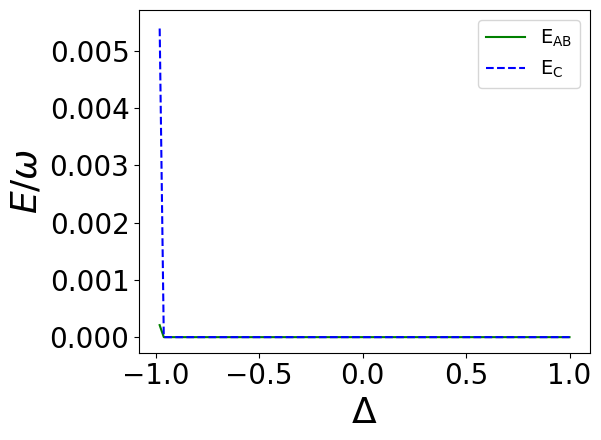

In [9]:
#A: Charger
#C: Cavity
#B: Battery

def eigenvalues(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenValues
    
def eigenvectors(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenVectors

def trace_A(rho):
    """Partial trace over the TLS degrees of freedom"""
    rho_q = np.zeros(shape=(2, 2), dtype=np.complex_)
    rho_q[0, 0] = rho[0, 0] + rho[2, 2]
    rho_q[0, 1] = rho[0, 1] + rho[2, 3]
    rho_q[1, 0] = rho[1, 0] + rho[3, 2]
    rho_q[1, 1] = rho[1, 1] + rho[3, 3]
    return qt.Qobj(rho_q)


def H1_coeff(t, args):
      return  np.exp(-(t*1j*omega))
def H2_coeff(t, args):
      return  np.exp(t*1j*omega)

N=8
gamma=0.05
kappa=0.05
omega=1
gac=0.1*omega
gbc=0.1*omega
gab=0.5*omega
F=0.05*omega
Nb=0
s = 100
omega_max = 2
W_f = np.linspace(0, omega_max, s)
Delta = np.zeros(len(W_f))
Energy_0 = np.zeros(len(W_f))
Ergotropy_0 = np.zeros(len(W_f))
Energy_1 = np.zeros(len(W_f))
Ergotropy_1 = np.zeros(len(W_f))
Energy_25 = np.zeros(len(W_f))
Ergotropy_25 = np.zeros(len(W_f))
Energy_35 = np.zeros(len(W_f))
Ergotropy_35 = np.zeros(len(W_f))

for k in range (len(W_f)):
    omega_f = k*(omega_max)/s
    Delta[k] = omega - omega_f
    def H1_coeff(t, args):
        return  np.exp(-(t*1j*(omega_f)))

    def H2_coeff(t, args):
        return  np.exp(t*1j*(omega_f))

    HA = omega*qt.create(2)*qt.destroy(2)
    HC = omega*qt.create(N)*qt.destroy(N)
    HB = omega*qt.create(2)*qt.destroy(2)
   #HL = omega*qt.tensor(HC, qt.qeye(N)) + omega*qt.tensor(qt.qeye(2), HB)

    HAC = gac*(qt.tensor(qt.create(2), qt.destroy(N), qt.qeye(2)) + qt.tensor(qt.destroy(2), qt.create(N), qt.qeye(2)))
    HBC = gbc*(qt.tensor(qt.qeye(2), qt.create(N), qt.destroy(2)) + qt.tensor(qt.qeye(2), qt.destroy(N), qt.create(2)))
    HAB = gab*(qt.tensor(qt.create(2), qt.qeye(N), qt.destroy(2)) + qt.tensor(qt.destroy(2), qt.qeye(N), qt.create(2)))
    HAplusB = qt.tensor(HA, qt.qeye(2)) + qt.tensor(qt.qeye(2), HB) + gab*(qt.tensor(qt.create(2), qt.destroy(2)) + qt.tensor(qt.destroy(2), qt.create(2)))
    H1 = qt.tensor(qt.qeye(2), F*qt.create(N), qt.qeye(2))
    H2 = qt.tensor(qt.qeye(2), F*qt.destroy(N), qt.qeye(2))

    H0 = qt.tensor(HA, qt.qeye(N), qt.qeye(2)) +qt.tensor(qt.qeye(2), HC, qt.qeye(2)) + qt.tensor(qt.qeye(2), qt.qeye(N), HB) + HAC + HBC
    H = [H0, [H1, H1_coeff], [H2, H2_coeff]]

    t = np.linspace(0, 25, 10000)
    psi0 = qt.tensor(qt.basis(2,0), qt.basis(N,0), qt.basis(2,0))
    output = qt.mesolve(H, psi0, t, [qt.tensor(np.sqrt(gamma*omega*(Nb+1))*qt.destroy(2), qt.qeye(N), qt.qeye(2)), qt.tensor(np.sqrt(gamma*omega*Nb)*qt.create(2), qt.qeye(N), qt.qeye(2)), qt.tensor(qt.qeye(2), np.sqrt(kappa*omega*(Nb+1))*qt.destroy(N), qt.qeye(2)), qt.tensor(qt.qeye(2), np.sqrt(kappa*omega*Nb)*qt.create(N), qt.qeye(2)), qt.tensor(qt.qeye(2), qt.qeye(N), np.sqrt(gamma*omega*(Nb+1))*qt.destroy(2)), qt.tensor(qt.qeye(2), qt.qeye(N), np.sqrt(gamma*omega*Nb)*qt.create(2))], [])

    Energy=np.zeros(10000)
    Ergotropy=np.zeros(10000)
    Energy1=np.zeros(10000)
    Ergotropy1=np.zeros(10000)
    Energy2=np.zeros(10000)
    Ergotropy2=np.zeros(10000)
    Energy3=np.zeros(10000)
    Ergotropy3=np.zeros(10000)
v=eigenvectors(HA)
v1=eigenvectors(HB)
v2=eigenvectors(HC)
v3=eigenvectors(HAplusB)


for i in range(0, 10000):
    A=np.array(output.states[i])
    FinalRhoAB=np.trace(A.reshape(2, N, 2, 2, N, 2), axis1=1, axis2=4)
    FinalRhoAB=FinalRhoAB.reshape(2*2, 2*2)
    FinalRhoA=np.trace(FinalRhoAB.reshape(2, 2, 2, 2), axis1=1, axis2=3)
    FinalRhoA=FinalRhoA.reshape(2, 2)
    FinalRhoBC=np.trace(A.reshape(2, N, 2, 2, N, 2), axis1=0, axis2=3)
    FinalRhoBC=FinalRhoBC.reshape(N*2, N*2)
    FinalRhoB=np.trace(FinalRhoBC.reshape(N, 2, N, 2), axis1=0, axis2=2)
    FinalRhoB=FinalRhoB.reshape(2, 2)
    FinalRhoC=np.trace(FinalRhoBC.reshape(N, 2, N, 2), axis1=1, axis2=3)
    FinalRhoC=FinalRhoC.reshape(N, N)


Rho_f=np.zeros((2, 2))
for j in range(0, 2):
    Rho_f=np.array(eigenvalues(FinalRhoA)[2-1-j]*qt.Qobj(v[:, j])*qt.Qobj(v[:, j]).dag()) + Rho_f
    Energy[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HA), FinalRhoA)))
    Ergotropy[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HA),(Rho_f - FinalRhoA)))) 
    Energy_0[k] = Energy[-1]
    Ergotropy_0[k] = Ergotropy[-1]

Rho_f=np.zeros((2, 2))
for j in range(0, 2):
    Rho_f=np.array(eigenvalues(FinalRhoB)[2-1-j]*qt.Qobj(v1[:,j])*qt.Qobj(v1[:, j]).dag()) + Rho_f
    Energy1[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HB), FinalRhoB)))
    Ergotropy1[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HB),(Rho_f - FinalRhoB)))) 
    Energy_1[k] = Energy[-1]
    Ergotropy_1[k] = Ergotropy[-1]

Rho_f=np.zeros((N, N))
for j in range(0, N):
    Rho_f=np.array(eigenvalues(FinalRhoC)[N-1-j]*qt.Qobj(v2[:, j])*qt.Qobj(v2[:, j]).dag()) + Rho_f
    Energy2[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HC), FinalRhoC)))
    Ergotropy2[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HC), (Rho_f-FinalRhoC))))
    Energy_25[k] = Energy2[-1]
    Ergotropy_25[k] = Ergotropy2[-1]
    
Rho_f=np.zeros((2*2, 2*2))
for j in range(0, 2*2):
    Rho_f=np.array(eigenvalues(FinalRhoAB)[2*2-1-j]*qt.Qobj(v3[:, j])*qt.Qobj(v3[:, j]).dag()) + Rho_f
    Energy3[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HAplusB), FinalRhoAB)))
    Ergotropy3[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HAplusB),(Rho_f - FinalRhoAB)))) 
    Energy_35[k] = Energy3[-1]
    Ergotropy_35[k] = Ergotropy3[-1]


fig3, axs = plt.subplots()
plt.plot(Delta, Energy_35, color='green', label = "$\mathregular{E_{AB}}$")
plt.plot(Delta, Energy_25, ls='dashed', color='blue', label = "$\mathregular{E_{C}}$")
plt.ylabel("$E/\omega$", fontsize=26)
plt.xlabel("$\Delta$", fontsize=26)
plt.legend(loc="upper right", fontsize=14)
plt.tight_layout()
plt.savefig("EnergyABCvsDelta-kappa=0.05.pdf", format='pdf')

ValueError: x and y must have same first dimension, but have shapes (100,) and (10000,)

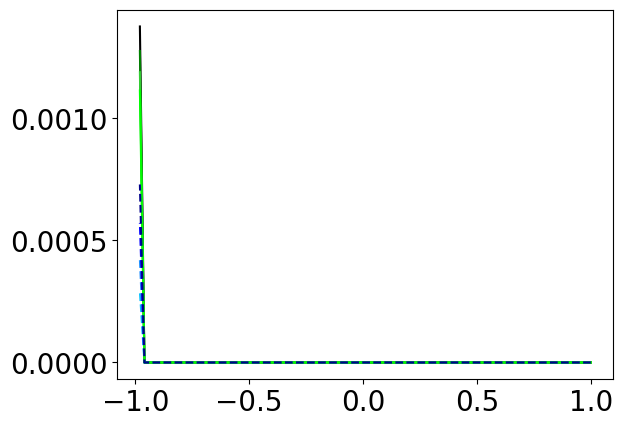

In [10]:
fig5, axs = plt.subplots()
plt.plot(Delta, Energy_31, color='black', label = "$\Gamma=0.2$")
plt.plot(Delta, Energy_21, ls='dashed', color='deepskyblue', label = "$\Gamma=0.2$")
plt.plot(Delta, Energy_32, color='green', label = "$\Gamma=0.4$")
plt.plot(Delta, Energy_22, ls='dashed', color='dodgerblue', label = "$\Gamma=0.4$")
plt.plot(Delta, Energy_33, color='limegreen', label = "$\Gamma=0.6$")
plt.plot(Delta, Energy_23, ls='dashed', color='blue', label = "$\Gamma=0.6$")
plt.plot(Delta, Energy_34, color='lime', label = "$\Gamma=0.8$")
plt.plot(Delta, Energy_24, ls='dashed', color='darkblue', label = "$\Gamma=0.8$")
plt.plot(Delta, Energy3, color='aquamarine', label = "$\Gamma=1$")
plt.plot(Delta, Energy2, ls='dashed', color='black', label = "$\Gamma=1$")
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1))
plt.ylabel("$E/\omega$", fontsize=26)
plt.xlabel("$\Delta$", fontsize=26)
plt.legend(loc="upper right", fontsize=10)
plt.tight_layout()
plt.savefig("EnergyABCvsDelta-Allg.pdf", format='pdf')

In [ ]:
#A: Charger
#C: Cavity
#B: Battery

def eigenvalues(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenValues
    
def eigenvectors(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenVectors

def trace_A(rho):
    """Partial trace over the TLS degrees of freedom"""
    rho_q = np.zeros(shape=(2, 2), dtype=np.complex_)
    rho_q[0, 0] = rho[0, 0] + rho[2, 2]
    rho_q[0, 1] = rho[0, 1] + rho[2, 3]
    rho_q[1, 0] = rho[1, 0] + rho[3, 2]
    rho_q[1, 1] = rho[1, 1] + rho[3, 3]
    return qt.Qobj(rho_q)


def H1_coeff(t, args):
      return  np.exp(-(t*1j*omega))
def H2_coeff(t, args):
      return  np.exp(t*1j*omega)

N=8
gamma=0.05
kappa=0.01
omega_f = omega = 1
gac=0.1*omega
gbc=0.1*omega
F=0.05*omega
Nb=0
s = 100
g_max = 0.5*omega
Gab = np.linspace(0, g_max, s)
Energy_0 = np.zeros(len(Gab))
Ergotropy_0 = np.zeros(len(Gab))
Energy_1 = np.zeros(len(Gab))
Ergotropy_1 = np.zeros(len(Gab))
Energy_2 = np.zeros(len(Gab))
Ergotropy_2 = np.zeros(len(Gab))
Energy_3 = np.zeros(len(Gab))
Ergotropy_3 = np.zeros(len(Gab))

def H1_coeff(t, args):
    return  np.exp(-(t*1j*(omega_f)))

def H2_coeff(t, args):
    return  np.exp(t*1j*(omega_f))

for k in range (len(Gab)):
    gab = k*(g_max)/s

HA = omega*qt.create(2)*qt.destroy(2)
HC = omega*qt.create(N)*qt.destroy(N)
HB = omega*qt.create(2)*qt.destroy(2)
#HL = omega*qt.tensor(HC, qt.qeye(N)) + omega*qt.tensor(qt.qeye(2), HB)

HAC = gac*(qt.tensor(qt.create(2), qt.destroy(N), qt.qeye(2)) + qt.tensor(qt.destroy(2), qt.create(N), qt.qeye(2)))
HBC = gbc*(qt.tensor(qt.qeye(2), qt.create(N), qt.destroy(2)) + qt.tensor(qt.qeye(2), qt.destroy(N), qt.create(2)))
HAB = gab*(qt.tensor(qt.create(2), qt.qeye(N), qt.destroy(2)) + qt.tensor(qt.destroy(2), qt.qeye(N), qt.create(2)))
HAplusB = qt.tensor(HA, qt.qeye(2)) + qt.tensor(qt.qeye(2), HB) + gab*(qt.tensor(qt.create(2), qt.destroy(2)) + qt.tensor(qt.destroy(2), qt.create(2)))
H1 = qt.tensor(qt.qeye(2), F*qt.create(N), qt.qeye(2))
H2 = qt.tensor(qt.qeye(2), F*qt.destroy(N), qt.qeye(2))


H0 = qt.tensor(HA, qt.qeye(N), qt.qeye(2)) +qt.tensor(qt.qeye(2), HC, qt.qeye(2)) + qt.tensor(qt.qeye(2), qt.qeye(N), HB) + HAC + HBC
H = [H0, [H1, H1_coeff], [H2, H2_coeff]]

t = np.linspace(0, 25, 10000)
psi0 = qt.tensor(qt.basis(2,0), qt.basis(N,0), qt.basis(2,0))
output = qt.mesolve(H, psi0, t, [qt.tensor(np.sqrt(gamma*omega*(Nb+1))*qt.destroy(2), qt.qeye(N), qt.qeye(2)), qt.tensor(np.sqrt(gamma*omega*Nb)*qt.create(2), qt.qeye(N), qt.qeye(2)), qt.tensor(qt.qeye(2), np.sqrt(kappa*omega*(Nb+1))*qt.destroy(N), qt.qeye(2)), qt.tensor(qt.qeye(2), np.sqrt(kappa*omega*Nb)*qt.create(N), qt.qeye(2)), qt.tensor(qt.qeye(2), qt.qeye(N), np.sqrt(gamma*omega*(Nb+1))*qt.destroy(2)), qt.tensor(qt.qeye(2), qt.qeye(N), np.sqrt(gamma*omega*Nb)*qt.create(2))], [])

Energy=np.zeros(10000)
Ergotropy=np.zeros(10000)
Energy1=np.zeros(10000)
Ergotropy1=np.zeros(10000)
Energy2=np.zeros(10000)
Ergotropy2=np.zeros(10000)
Energy3=np.zeros(10000)
Ergotropy3=np.zeros(10000)
v=eigenvectors(HA)
v1=eigenvectors(HB)
v2=eigenvectors(HC)
v3=eigenvectors(HAplusB)


for i in range(0, 10000):
    A=np.array(output.states[i])
    FinalRhoAB=np.trace(A.reshape(2, N, 2, 2, N, 2), axis1=1, axis2=4)
    FinalRhoAB=FinalRhoAB.reshape(2*2, 2*2)
    FinalRhoA=np.trace(FinalRhoAB.reshape(2, 2, 2, 2), axis1=1, axis2=3)
    FinalRhoA=FinalRhoA.reshape(2, 2)
    FinalRhoBC=np.trace(A.reshape(2, N, 2, 2, N, 2), axis1=0, axis2=3)
    FinalRhoBC=FinalRhoBC.reshape(N*2, N*2)
    FinalRhoB=np.trace(FinalRhoBC.reshape(N, 2, N, 2), axis1=0, axis2=2)
    FinalRhoB=FinalRhoB.reshape(2, 2)
    FinalRhoC=np.trace(FinalRhoBC.reshape(N, 2, N, 2), axis1=1, axis2=3)
    FinalRhoC=FinalRhoC.reshape(N, N)


Rho_f=np.zeros((2, 2))
for j in range(0, 2):
    Rho_f=np.array(eigenvalues(FinalRhoA)[2-1-j]*qt.Qobj(v[:, j])*qt.Qobj(v[:, j]).dag()) + Rho_f
    Energy[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HA), FinalRhoA)))
    Ergotropy[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HA),(Rho_f - FinalRhoA)))) 
    Energy_0[k] = Energy[-1]
    Ergotropy_0[k] = Ergotropy[-1]

Rho_f=np.zeros((2, 2))
for j in range(0, 2):
    Rho_f=np.array(eigenvalues(FinalRhoB)[2-1-j]*qt.Qobj(v1[:,j])*qt.Qobj(v1[:, j]).dag()) + Rho_f
    Energy1[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HB), FinalRhoB)))
    Ergotropy1[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HB),(Rho_f - FinalRhoB)))) 
    Energy_1[k] = Energy[-1]
    Ergotropy_1[k] = Ergotropy[-1]

Rho_f=np.zeros((N, N)
for j in range(0, N):
    Rho_f=np.array(eigenvalues(FinalRhoC)[N-1-j]*qt.Qobj(v2[:, j])*qt.Qobj(v2[:, j]).dag()) + Rho_f
    Energy2[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HC), FinalRhoC)))
    Ergotropy2[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HC), (Rho_f-FinalRhoC))))
    Energy_2[k] = Energy2[-1]
    Ergotropy_2[k] = Ergotropy2[-1]
    
Rho_f=np.zeros((2*2, 2*2))
for j in range(0, 2*2):
    Rho_f=np.array(eigenvalues(FinalRhoAB)[2*2-1-j]*qt.Qobj(v3[:, j])*qt.Qobj(v3[:, j]).dag()) + Rho_f
    Energy3[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HAplusB), FinalRhoAB)))
    Ergotropy3[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HAplusB),(Rho_f - FinalRhoAB)))) 
    Energy_3[k] = Energy3[-1]
    Ergotropy_3[k] = Ergotropy3[-1]


fig3, axs = plt.subplots()
plt.plot(Gab, Energy_3, color='green', label = "$\mathregular{E_{B}}$")
plt.plot(Gab, Energy_2, ls='dashed', color='blue', label = "$\mathregular{E_{C}}$")
plt.ylabel("$E/\omega$", fontsize=26)
plt.xlabel("$\mathregular{g_{ab}}$", fontsize=26)
plt.legend(loc="upper right", fontsize=14)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.1))
plt.tight_layout()
plt.savefig("EnergyBvsgab.pdf", format='pdf')

In [ ]:
#A: Charger
#C: Cavity
#B: Battery

def eigenvalues(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenValues
    
def eigenvectors(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenVectors

def trace_A(rho):
    """Partial trace over the TLS degrees of freedom"""
    rho_q = np.zeros(shape=(2, 2), dtype=np.complex_)
    rho_q[0, 0] = rho[0, 0] + rho[2, 2]
    rho_q[0, 1] = rho[0, 1] + rho[2, 3]
    rho_q[1, 0] = rho[1, 0] + rho[3, 2]
    rho_q[1, 1] = rho[1, 1] + rho[3, 3]
    return qt.Qobj(rho_q)


def H1_coeff(t, args):
      return  np.exp(-(t*1j*omega))
def H2_coeff(t, args):
      return  np.exp(t*1j*omega)

N=8
T_f = 50
Steps = 10000
t = np.linspace(0, T_f, Steps)
t1 = np.linspace(0, T_f, Steps-1)
gamma=0.05
kappa=0.01
omega_f = omega = 1
gac=0.1*omega
gbc=0.1*omega
gab=0.5*omega
F=0.05*omega
Nb=0


def H1_coeff(t, args):
    return  np.exp(-(t*1j*(omega_f)))

def H2_coeff(t, args):
    return  np.exp(t*1j*(omega_f))

HA = omega*qt.create(2)*qt.destroy(2)
HC = omega*qt.create(N)*qt.destroy(N)
HB = omega*qt.create(2)*qt.destroy(2)
#HL = omega*qt.tensor(HC, qt.qeye(N)) + omega*qt.tensor(qt.qeye(2), HB)

HAC = gac*(qt.tensor(qt.create(2), qt.destroy(N), qt.qeye(2)) + qt.tensor(qt.destroy(2), qt.create(N), qt.qeye(2)))
HBC = gbc*(qt.tensor(qt.qeye(2), qt.create(N), qt.destroy(2)) + qt.tensor(qt.qeye(2), qt.destroy(N), qt.create(2)))
HAB = gab*(qt.tensor(qt.create(2), qt.qeye(N), qt.destroy(2)) + qt.tensor(qt.destroy(2), qt.qeye(N), qt.create(2)))
HAplusB = qt.tensor(HA, qt.qeye(2)) + qt.tensor(qt.qeye(2), HB) + gab*(qt.tensor(qt.create(2), qt.destroy(2)) + qt.tensor(qt.destroy(2), qt.create(2)))
H1 = qt.tensor(qt.qeye(2), F*qt.create(N), qt.qeye(2))
H2 = qt.tensor(qt.qeye(2), F*qt.destroy(N), qt.qeye(2))

H0 = qt.tensor(HA, qt.qeye(N), qt.qeye(2)) +qt.tensor(qt.qeye(2), HC, qt.qeye(2)) + qt.tensor(qt.qeye(2), qt.qeye(N), HB) + HAC + HBC
H = [H0, [H1, H1_coeff], [H2, H2_coeff]]

psi0 = qt.tensor(qt.basis(2,0), qt.basis(N,0), qt.basis(2,0))
output = qt.mesolve(H, psi0, t, [qt.tensor(np.sqrt(gamma*omega*(Nb+1))*qt.destroy(2), qt.qeye(N), qt.qeye(2)), qt.tensor(np.sqrt(gamma*omega*Nb)*qt.create(2), qt.qeye(N), qt.qeye(2)), qt.tensor(qt.qeye(2), np.sqrt(kappa*omega*(Nb+1))*qt.destroy(N), qt.qeye(2)), qt.tensor(qt.qeye(2), np.sqrt(kappa*omega*Nb)*qt.create(N), qt.qeye(2)), qt.tensor(qt.qeye(2), qt.qeye(N), np.sqrt(gamma*omega*(Nb+1))*qt.destroy(2)), qt.tensor(qt.qeye(2), qt.qeye(N), np.sqrt(gamma*omega*Nb)*qt.create(2))], [])

Energy=np.zeros(Steps)
Ergotropy=np.zeros(Steps)
Energy1=np.zeros(Steps)
Ergotropy1=np.zeros(Steps)
Energy2=np.zeros(Steps)
Ergotropy2=np.zeros(Steps)
Energy3=np.zeros(Steps)
Ergotropy3=np.zeros(Steps)
v=eigenvectors(HA)
v1=eigenvectors(HB)
v2=eigenvectors(HC)
v3=eigenvectors(HAplusB)
DE = np.zeros(len(t))
Dt = np.zeros(len(t))
P = np.zeros(len(t))


for i in range(0, Steps):
    A=np.array(output.states[i])
    FinalRhoAB=np.trace(A.reshape(2, N, 2, 2, N, 2), axis1=1, axis2=4)
    FinalRhoAB=FinalRhoAB.reshape(2*2, 2*2)
    FinalRhoA=np.trace(FinalRhoAB.reshape(2, 2, 2, 2), axis1=1, axis2=3)
    FinalRhoA=FinalRhoA.reshape(2, 2)
    FinalRhoBC=np.trace(A.reshape(2, N, 2, 2, N, 2), axis1=0, axis2=3)
    FinalRhoBC=FinalRhoBC.reshape(N*2, N*2)
    FinalRhoB=np.trace(FinalRhoBC.reshape(N, 2, N, 2), axis1=0, axis2=2)
    FinalRhoB=FinalRhoB.reshape(2, 2)
    FinalRhoC=np.trace(FinalRhoBC.reshape(N, 2, N, 2), axis1=1, axis2=3)
    FinalRhoC=FinalRhoC.reshape(N, N)

    Rho_f=np.zeros((2*2, 2*2))
    for j in range(0, 2*2):
        Rho_f=np.array(eigenvalues(FinalRhoAB)[2*2-1-j]*qt.Qobj(v3[:, j])*qt.Qobj(v3[:, j]).dag()) + Rho_f
    Energy3[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HAplusB), FinalRhoAB)))
    Ergotropy3[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HAplusB),(Rho_f - FinalRhoAB)))) 


DE = np.diff(Energy3)
Dt = np.diff(t)
P = DE/Dt

fig1, axs = plt.subplots()
plt.plot(t1, P, color='purple', label = "$\mathregular{P}$")
plt.plot(t, Energy3/t, color='green', label = "$\mathregular{\Delta P}$")
plt.ylabel("$P$", fontsize=26)
plt.xlabel("$t$", fontsize=26)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.01))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))
plt.legend(loc="upper right", fontsize=14)
plt.tight_layout()
plt.savefig("PowervsTime-kappa=0.01.pdf", format='pdf')

fig2, axs = plt.subplots()
plt.plot(t, 10*Energy3/t, color='green', label = "$\mathregular{\Delta P*10}$")
plt.plot(t, Energy3, color='red', label = "$\mathregular{E_B}$")
plt.ylabel("$E, P$", fontsize=26)
plt.xlabel("$t$", fontsize=26)
#plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.01))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))
plt.legend(loc="upper right", fontsize=14)
plt.tight_layout()
plt.savefig("EnergyBvsTime-kappa=0.01.pdf", format='pdf')

In [ ]:
from matplotlib import pyplot as mp
import numpy as np

def Gaussian(t, md, sig):
    return (2.5)*np.exp(-(t - md)**2/(2*sig**2))/(np.sqrt(2*np.pi)*sig)

t_values = np.linspace(0, 6, 120)
for md, sig in [(3, 1)]:
    mp.plot(t_values, Gaussian(t_values, md, sig))

mp.show()

In [ ]:
#A: Charger
#C: Cavity
#B: Battery

def eigenvalues(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenValues
    
def eigenvectors(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenVectors

def trace_A(rho):
    """Partial trace over the TLS degrees of freedom"""
    rho_q = np.zeros(shape=(2, 2), dtype=np.complex_)
    rho_q[0, 0] = rho[0, 0] + rho[2, 2]
    rho_q[0, 1] = rho[0, 1] + rho[2, 3]
    rho_q[1, 0] = rho[1, 0] + rho[3, 2]
    rho_q[1, 1] = rho[1, 1] + rho[3, 3]
    return qt.Qobj(rho_q)

sig = 1
md = 3
amp = 2.5

def Gaussian(t, args):
    return amp*np.exp(-(t - md)**2/(2*sig**2))/(np.sqrt(2*np.pi)*sig)


N = 6
gamma = 0.05
kappa = 0.01
omega = 1
gac = 0.1*omega
gbc = 0.1*omega
gab = 0.5*omega
F = 0.05*omega
Nb = 0
s = 20
omega_max = 2
W_f = np.linspace(0, omega_max, s)
Delta = np.zeros(len(W_f))
Energy_0 = np.zeros(len(W_f))
Ergotropy_0 = np.zeros(len(W_f))
Energy_1 = np.zeros(len(W_f))
Ergotropy_1 = np.zeros(len(W_f))
Energy_21 = np.zeros(len(W_f))
Ergotropy_21 = np.zeros(len(W_f))
Energy_31 = np.zeros(len(W_f))
Ergotropy_31 = np.zeros(len(W_f))

for k in range (len(W_f)):
    omega_f = k*(omega_max)/s
    Delta[k] = omega - omega_f

HA = omega*qt.create(2)*qt.destroy(2)
HC = omega*qt.create(N)*qt.destroy(N)
HB = omega*qt.create(2)*qt.destroy(2)
#HL = omega*qt.tensor(HC, qt.qeye(N)) + omega*qt.tensor(qt.qeye(2), HB)

HAC = gac*(qt.tensor(qt.create(2), qt.destroy(N), qt.qeye(2)) + qt.tensor(qt.destroy(2), qt.create(N), qt.qeye(2)))
HBC = gbc*(qt.tensor(qt.qeye(2), qt.create(N), qt.destroy(2)) + qt.tensor(qt.qeye(2), qt.destroy(N), qt.create(2)))
HAB = gab*(qt.tensor(qt.create(2), qt.qeye(N), qt.destroy(2)) + qt.tensor(qt.destroy(2), qt.qeye(N), qt.create(2)))
HAplusB = qt.tensor(HA, qt.qeye(2)) + qt.tensor(qt.qeye(2), HB) + gab*(qt.tensor(qt.create(2), qt.destroy(2)) + qt.tensor(qt.destroy(2), qt.create(2)))
H1 = qt.tensor(qt.qeye(2), F*qt.create(N), qt.qeye(2))
H2 = qt.tensor(qt.qeye(2), F*qt.destroy(N), qt.qeye(2))

H0 = qt.tensor(HA, qt.qeye(N), qt.qeye(2)) + qt.tensor(qt.qeye(2), HC, qt.qeye(2)) + qt.tensor(qt.qeye(2), qt.qeye(N), HB) + HAC + HBC
H = [H0, [H1, Gaussian], [H2, Gaussian]]

t = np.linspace(0, 6, 10000)  
psi0 = qt.tensor(qt.basis(2,0), qt.basis(N,0), qt.basis(2,0))
output = qt.mesolve(H, psi0, t, [qt.tensor(np.sqrt(gamma*omega*(Nb+1))*qt.destroy(2), qt.qeye(N), qt.qeye(2)), qt.tensor(np.sqrt(gamma*omega*Nb)*qt.create(2), qt.qeye(N), qt.qeye(2)), qt.tensor(qt.qeye(2), np.sqrt(kappa*omega*(Nb+1))*qt.destroy(N), qt.qeye(2)), qt.tensor(qt.qeye(2), np.sqrt(kappa*omega*Nb)*qt.create(N), qt.qeye(2)), qt.tensor(qt.qeye(2), qt.qeye(N), np.sqrt(gamma*omega*(Nb+1))*qt.destroy(2)), qt.tensor(qt.qeye(2), qt.qeye(N), np.sqrt(gamma*omega*Nb)*qt.create(2))], [])

Energy=np.zeros(10000)
Ergotropy=np.zeros(10000)
Energy1=np.zeros(10000)
Ergotropy1=np.zeros(10000)
Energy2=np.zeros(10000)
Ergotropy2=np.zeros(10000)
Energy3=np.zeros(10000)
Ergotropy3=np.zeros(10000)
v=eigenvectors(HA)
v1=eigenvectors(HB)
v2=eigenvectors(HC)
v3=eigenvectors(HAplusB)


for i in range(0, 10000):
    A=np.array(output.states[i])
    FinalRhoAB=np.trace(A.reshape(2, N, 2, 2, N, 2), axis1=1, axis2=4)
    FinalRhoAB=FinalRhoAB.reshape(2*2, 2*2)
    FinalRhoA=np.trace(FinalRhoAB.reshape(2, 2, 2, 2), axis1=1, axis2=3)
    FinalRhoA=FinalRhoA.reshape(2, 2)
    FinalRhoBC=np.trace(A.reshape(2, N, 2, 2, N, 2), axis1=0, axis2=3)
    FinalRhoBC=FinalRhoBC.reshape(N*2, N*2)
    FinalRhoB=np.trace(FinalRhoBC.reshape(N, 2, N, 2), axis1=0, axis2=2)
    FinalRhoB=FinalRhoB.reshape(2, 2)
    FinalRhoC=np.trace(FinalRhoBC.reshape(N, 2, N, 2), axis1=1, axis2=3)
    FinalRhoC=FinalRhoC.reshape(N, N)


Rho_f=np.zeros((2, 2))
for j in range(0, 2):
    Rho_f=np.array(eigenvalues(FinalRhoA)[2-1-j]*qt.Qobj(v[:, j])*qt.Qobj(v[:, j]).dag()) + Rho_f
    Energy[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HA), FinalRhoA)))
    Ergotropy[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HA),(Rho_f - FinalRhoA)))) 
    Energy_0[k] = Energy[-1]
    Ergotropy_0[k] = Ergotropy[-1]

Rho_f=np.zeros((2, 2))
for j in range(0, 2):
    Rho_f=np.array(eigenvalues(FinalRhoB)[2-1-j]*qt.Qobj(v1[:,j])*qt.Qobj(v1[:, j]).dag()) + Rho_f
    Energy1[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HB), FinalRhoB)))
    Ergotropy1[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HB),(Rho_f - FinalRhoB)))) 
    Energy_1[k] = Energy[-1]
    Ergotropy_1[k] = Ergotropy[-1]

Rho_f=np.zeros((N, N))
for j in range(0, N):
    Rho_f=np.array(eigenvalues(FinalRhoC)[N-1-j]*qt.Qobj(v2[:, j])*qt.Qobj(v2[:, j]).dag()) + Rho_f
    Energy2[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HC), FinalRhoC)))
    Ergotropy2[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HC), (Rho_f-FinalRhoC))))
    Energy_21[k] = Energy2[-1]
    Ergotropy_21[k] = Ergotropy2[-1]
    
Rho_f=np.zeros((2*2, 2*2))
for j in range(0, 2*2):
    Rho_f=np.array(eigenvalues(FinalRhoAB)[2*2-1-j]*qt.Qobj(v3[:, j])*qt.Qobj(v3[:, j]).dag()) + Rho_f
    Energy3[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HAplusB), FinalRhoAB)))
    Ergotropy3[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HAplusB),(Rho_f - FinalRhoAB))))
    Energy_31[k] = Energy3[-1]
    Ergotropy_31[k] = Ergotropy3[-1]


fig3, axs = plt.subplots()
plt.plot(Delta, Energy_31, color='green', label = "$\mathregular{E_{AB}}$")
plt.plot(Delta, Energy_21, ls='dashed', color='blue', label = "$\mathregular{E_{C}}$")
plt.ylabel("$E/\omega$", fontsize=26)
plt.xlabel("$\Delta$", fontsize=26)
plt.legend(loc="upper right", fontsize=14)
plt.tight_layout()
plt.savefig("EnergyABCvsDelta-Gaussian.pdf", format='pdf')

In [ ]:
#A: Charger
#C: Cavity
#B: Battery

def eigenvalues(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenValues
    
def eigenvectors(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenVectors

def trace_A(rho):
    """Partial trace over the TLS degrees of freedom"""
    rho_q = np.zeros(shape=(2, 2), dtype=np.complex_)
    rho_q[0, 0] = rho[0, 0] + rho[2, 2]
    rho_q[0, 1] = rho[0, 1] + rho[2, 3]
    rho_q[1, 0] = rho[1, 0] + rho[3, 2]
    rho_q[1, 1] = rho[1, 1] + rho[3, 3]
    return qt.Qobj(rho_q)


def H1_coeff(t, args):
      return  np.exp(-(t*1j*omega))
def H2_coeff(t, args):
      return  np.exp(t*1j*omega)

N=8
gamma=0.05
kappa=0.01
omega=1
gac=0.1*omega
gbc=0.1*omega
gab=0.5*omega
F=0.05*omega
Nb=0
s = 100
omega_max = 2
W_f = np.linspace(0, omega_max, s)
Delta = np.zeros(len(W_f))
Energy_0 = np.zeros(len(W_f))
Ergotropy_0 = np.zeros(len(W_f))
Energy_1 = np.zeros(len(W_f))
Ergotropy_1 = np.zeros(len(W_f))
Energy_21 = np.zeros(len(W_f))
Ergotropy_21 = np.zeros(len(W_f))
Energy_31 = np.zeros(len(W_f))
Ergotropy_31 = np.zeros(len(W_f))

for k in range (len(W_f)):
    omega_f = k*(omega_max)/s
    Delta[k] = omega - omega_f

def H1_coeff(t, args):
    return  np.exp(-(t*1j*(omega_f)))

def H2_coeff(t, args):
    return  np.exp(t*1j*(omega_f))

HA = omega*qt.create(2)*qt.destroy(2)
HC = omega*qt.create(N)*qt.destroy(N)
HB = omega*qt.create(2)*qt.destroy(2)
#HL = omega*qt.tensor(HC, qt.qeye(N)) + omega*qt.tensor(qt.qeye(2), HB)

HAC = gac*(qt.tensor(qt.create(2), qt.destroy(N), qt.qeye(2)) + qt.tensor(qt.destroy(2), qt.create(N), qt.qeye(2)))
HBC = gbc*(qt.tensor(qt.qeye(2), qt.create(N), qt.destroy(2)) + qt.tensor(qt.qeye(2), qt.destroy(N), qt.create(2)))
HAB = gab*(qt.tensor(qt.create(2), qt.qeye(N), qt.destroy(2)) + qt.tensor(qt.destroy(2), qt.qeye(N), qt.create(2)))
HAplusB = qt.tensor(HA, qt.qeye(2)) + qt.tensor(qt.qeye(2), HB) + gab*(qt.tensor(qt.create(2), qt.destroy(2)) + qt.tensor(qt.destroy(2), qt.create(2)))
H1 = qt.tensor(qt.qeye(2), F*qt.create(N), qt.qeye(2))
H2 = qt.tensor(qt.qeye(2), F*qt.destroy(N), qt.qeye(2))

H0 = qt.tensor(HA, qt.qeye(N), qt.qeye(2)) + qt.tensor(qt.qeye(2), HC, qt.qeye(2)) + qt.tensor(qt.qeye(2), qt.qeye(N), HB) + HAC + HBC
H = [H0, [H1, H1_coeff], [H2, H2_coeff]]

t = np.linspace(0, 25, 10000)
psi0 = qt.tensor(qt.basis(2,0), qt.basis(N,0), qt.basis(2,0))
output = qt.mesolve(H, psi0, t, [], [])

Energy=np.zeros(10000)
Ergotropy=np.zeros(10000)
Energy1=np.zeros(10000)
Ergotropy1=np.zeros(10000)
Energy2=np.zeros(10000)
Ergotropy2=np.zeros(10000)
Energy3=np.zeros(10000)
Ergotropy3=np.zeros(10000)
v=eigenvectors(HA)
v1=eigenvectors(HB)
v2=eigenvectors(HC)
v3=eigenvectors(HAplusB)


for i in range(0, 10000):
    A=np.array(output.states[i]*output.states[i].dag())
    FinalRhoAB=np.trace(A.reshape(2, N, 2, 2, N, 2), axis1=1, axis2=4)
    FinalRhoAB=FinalRhoAB.reshape(2*2, 2*2)
    FinalRhoA=np.trace(FinalRhoAB.reshape(2, 2, 2, 2), axis1=1, axis2=3)
    FinalRhoA=FinalRhoA.reshape(2, 2)
    FinalRhoBC=np.trace(A.reshape(2, N, 2, 2, N, 2), axis1=0, axis2=3)
    FinalRhoBC=FinalRhoBC.reshape(N*2, N*2)
    FinalRhoB=np.trace(FinalRhoBC.reshape(N, 2, N, 2), axis1=0, axis2=2)
    FinalRhoB=FinalRhoB.reshape(2, 2)
    FinalRhoC=np.trace(FinalRhoBC.reshape(N, 2, N, 2), axis1=1, axis2=3)
    FinalRhoC=FinalRhoC.reshape(N, N)


Rho_f=np.zeros((2, 2))
for j in range(0, 2):
    Rho_f=np.array(eigenvalues(FinalRhoA)[2-1-j]*qt.Qobj(v[:, j])*qt.Qobj(v[:, j]).dag()) + Rho_f
    Energy[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HA), FinalRhoA)))
    Ergotropy[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HA),(Rho_f - FinalRhoA)))) 
    Energy_0[k] = Energy[-1]
    Ergotropy_0[k] = Ergotropy[-1]

Rho_f=np.zeros((2, 2))
for j in range(0, 2):
    Rho_f=np.array(eigenvalues(FinalRhoB)[2-1-j]*qt.Qobj(v1[:,j])*qt.Qobj(v1[:, j]).dag()) + Rho_f
    Energy1[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HB), FinalRhoB)))
    Ergotropy1[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HB),(Rho_f - FinalRhoB)))) 
    Energy_1[k] = Energy[-1]
    Ergotropy_1[k] = Ergotropy[-1]

Rho_f=np.zeros((N, N))
for j in range(0, N):
    Rho_f=np.array(eigenvalues(FinalRhoC)[N-1-j]*qt.Qobj(v2[:, j])*qt.Qobj(v2[:, j]).dag()) + Rho_f
    Energy2[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HC), FinalRhoC)))
    Ergotropy2[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HC), (Rho_f-FinalRhoC))))
    Energy_21[k] = Energy2[-1]
    Ergotropy_21[k] = Ergotropy2[-1]
    
Rho_f=np.zeros((2*2, 2*2))
for j in range(0, 2*2):
    Rho_f=np.array(eigenvalues(FinalRhoAB)[2*2-1-j]*qt.Qobj(v3[:, j])*qt.Qobj(v3[:, j]).dag()) + Rho_f
    Energy3[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HAplusB), FinalRhoAB)))
    Ergotropy3[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HAplusB),(Rho_f - FinalRhoAB)))) 
    Energy_31[k] = Energy3[-1]
    Ergotropy_31[k] = Ergotropy3[-1]


fig, axs = plt.subplots()
plt.plot(Delta, Energy_31, color='green', label = "$\mathregular{E_{B}}$")
plt.plot(Delta, Energy_21, ls='dashed', color='blue', label = "$\mathregular{E_{C}}$")
plt.ylabel("$E/\omega$", fontsize=26)
plt.xlabel("$\Delta$", fontsize=26)
plt.legend(loc="upper right", fontsize=14)
plt.tight_layout()
plt.savefig("EnergyABCvsDelta-NoDissipation-gab=0.5.pdf", format='pdf')

In [ ]:
#A: Charger
#C: Cavity
#B: Battery

def eigenvalues(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenValues
    
def eigenvectors(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenVectors

def trace_A(rho):
    """Partial trace over the TLS degrees of freedom"""
    rho_q = np.zeros(shape=(2, 2), dtype=np.complex_)
    rho_q[0, 0] = rho[0, 0] + rho[2, 2]
    rho_q[0, 1] = rho[0, 1] + rho[2, 3]
    rho_q[1, 0] = rho[1, 0] + rho[3, 2]
    rho_q[1, 1] = rho[1, 1] + rho[3, 3]
    return qt.Qobj(rho_q)


def H1_coeff(t, args):
      return  np.exp(-(t*1j*omega))
def H2_coeff(t, args):
      return  np.exp(t*1j*omega)

N=8
gamma=0.00
kappa=0.00
omega=1
gac=0.1*omega
gbc=0.1*omega
gab=0.4*omega
F=0.05*omega
Nb=0
s = 100
omega_max = 2
W_f = np.linspace(0, omega_max, s)
Delta = np.zeros(len(W_f))
Energy_0 = np.zeros(len(W_f))
Ergotropy_0 = np.zeros(len(W_f))
Energy_1 = np.zeros(len(W_f))
Ergotropy_1 = np.zeros(len(W_f))
Energy_24 = np.zeros(len(W_f))
Ergotropy_24 = np.zeros(len(W_f))
Energy_34 = np.zeros(len(W_f))
Ergotropy_34 = np.zeros(len(W_f))

for k in range (len(W_f)):
    omega_f = k*(omega_max)/s
    Delta[k] = omega - omega_f

def H1_coeff(t, args):
    return  np.exp(-(t*1j*(omega_f)))

def H2_coeff(t, args):
    return  np.exp(t*1j*(omega_f))

HA = omega*qt.create(2)*qt.destroy(2)
HC = omega*qt.create(N)*qt.destroy(N)
HB = omega*qt.create(2)*qt.destroy(2)
#HL = omega*qt.tensor(HC, qt.qeye(N)) + omega*qt.tensor(qt.qeye(2), HB)

HAC = gac*(qt.tensor(qt.create(2), qt.destroy(N), qt.qeye(2)) + qt.tensor(qt.destroy(2), qt.create(N), qt.qeye(2)))
HBC = gbc*(qt.tensor(qt.qeye(2), qt.create(N), qt.destroy(2)) + qt.tensor(qt.qeye(2), qt.destroy(N), qt.create(2)))
HAB = gab*(qt.tensor(qt.create(2), qt.qeye(N), qt.destroy(2)) + qt.tensor(qt.destroy(2), qt.qeye(N), qt.create(2)))
HAplusB = qt.tensor(HA, qt.qeye(2)) + qt.tensor(qt.qeye(2), HB) + gab*(qt.tensor(qt.create(2), qt.destroy(2)) + qt.tensor(qt.destroy(2), qt.create(2)))
H1 = qt.tensor(qt.qeye(2), F*qt.create(N), qt.qeye(2))
H2 = qt.tensor(qt.qeye(2), F*qt.destroy(N), qt.qeye(2))

H0 = qt.tensor(HA, qt.qeye(N), qt.qeye(2)) + qt.tensor(qt.qeye(2), HC, qt.qeye(2)) + qt.tensor(qt.qeye(2), qt.qeye(N), HB) + HAC + HBC
H = [H0, [H1, H1_coeff], [H2, H2_coeff]]

t = np.linspace(0, 25, 10000)
psi0 = qt.tensor(qt.basis(2,0), qt.basis(N,0), qt.basis(2,0))
output = qt.mesolve(H, psi0, t, [], [])

Energy=np.zeros(10000)
Ergotropy=np.zeros(10000)
Energy1=np.zeros(10000)
Ergotropy1=np.zeros(10000)
Energy2=np.zeros(10000)
Ergotropy2=np.zeros(10000)
Energy3=np.zeros(10000)
Ergotropy3=np.zeros(10000)
v=eigenvectors(HA)
v1=eigenvectors(HB)
v2=eigenvectors(HC)
v3=eigenvectors(HAplusB)


for i in range(0, 10000):
    A=np.array(output.states[i]*output.states[i].dag())
    FinalRhoAB=np.trace(A.reshape(2, N, 2, 2, N, 2), axis1=1, axis2=4)
    FinalRhoAB=FinalRhoAB.reshape(2*2, 2*2)
    FinalRhoA=np.trace(FinalRhoAB.reshape(2, 2, 2, 2), axis1=1, axis2=3)
    FinalRhoA=FinalRhoA.reshape(2, 2)
    FinalRhoBC=np.trace(A.reshape(2, N, 2, 2, N, 2), axis1=0, axis2=3)
    FinalRhoBC=FinalRhoBC.reshape(N*2, N*2)
    FinalRhoB=np.trace(FinalRhoBC.reshape(N, 2, N, 2), axis1=0, axis2=2)
    FinalRhoB=FinalRhoB.reshape(2, 2)
    FinalRhoC=np.trace(FinalRhoBC.reshape(N, 2, N, 2), axis1=1, axis2=3)
    FinalRhoC=FinalRhoC.reshape(N, N)


Rho_f=np.zeros((2, 2))
for j in range(0, 2):
    Rho_f=np.array(eigenvalues(FinalRhoA)[2-1-j]*qt.Qobj(v[:, j])*qt.Qobj(v[:, j]).dag()) + Rho_f
    Energy[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HA), FinalRhoA)))
    Ergotropy[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HA),(Rho_f - FinalRhoA)))) 
    Energy_0[k] = Energy[-1]
    Ergotropy_0[k] = Ergotropy[-1]

Rho_f=np.zeros((2, 2))
for j in range(0, 2):
    Rho_f=np.array(eigenvalues(FinalRhoB)[2-1-j]*qt.Qobj(v1[:,j])*qt.Qobj(v1[:, j]).dag()) + Rho_f
    Energy1[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HB), FinalRhoB)))
    Ergotropy1[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HB),(Rho_f - FinalRhoB)))) 
    Energy_1[k] = Energy[-1]
    Ergotropy_1[k] = Ergotropy[-1]

Rho_f=np.zeros((N, N))
for j in range(0, N):
    Rho_f=np.array(eigenvalues(FinalRhoC)[N-1-j]*qt.Qobj(v2[:, j])*qt.Qobj(v2[:, j]).dag()) + Rho_f
    Energy2[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HC), FinalRhoC)))
    Ergotropy2[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HC), (Rho_f-FinalRhoC))))
    Energy_24[k] = Energy2[-1]
    Ergotropy_24[k] = Ergotropy2[-1]
    
Rho_f=np.zeros((2*2, 2*2))
for j in range(0, 2*2):
        Rho_f=np.array(eigenvalues(FinalRhoAB)[2*2-1-j]*qt.Qobj(v3[:, j])*qt.Qobj(v3[:, j]).dag()) + Rho_f
    Energy3[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HAplusB), FinalRhoAB)))
    Ergotropy3[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HAplusB),(Rho_f - FinalRhoAB)))) 
    Energy_34[k] = Energy3[-1]
    Ergotropy_34[k] = Ergotropy3[-1]


fig, axs = plt.subplots()
plt.plot(Delta, Energy_34, color='green', label = "$\mathregular{E_{AB}}$")
plt.plot(Delta, Energy_24, ls='dashed', color='blue', label = "$\mathregular{E_{C}}$")
plt.ylabel("$E/\omega$", fontsize=26)
plt.xlabel("$\Delta$", fontsize=26)
plt.legend(loc="upper right", fontsize=14)
plt.tight_layout()
plt.savefig("EnergyABCvsDelta-NoDissipation-gab=0.4.pdf", format='pdf')

In [ ]:
#A: Charger
#C: Cavity
#B: Battery

def eigenvalues(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenValues
    
def eigenvectors(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenVectors

def trace_A(rho):
    """Partial trace over the TLS degrees of freedom"""
    rho_q = np.zeros(shape=(2, 2), dtype=np.complex_)
    rho_q[0, 0] = rho[0, 0] + rho[2, 2]
    rho_q[0, 1] = rho[0, 1] + rho[2, 3]
    rho_q[1, 0] = rho[1, 0] + rho[3, 2]
    rho_q[1, 1] = rho[1, 1] + rho[3, 3]
    return qt.Qobj(rho_q)


def H1_coeff(t, args):
      return  np.exp(-(t*1j*omega))
def H2_coeff(t, args):
      return  np.exp(t*1j*omega)

N=8
gamma=0.00
kappa=0.00
omega=1
gac=0.1*omega
gbc=0.1*omega
gab=0.3*omega
F=0.05*omega
Nb=0
s = 100
omega_max = 2
W_f = np.linspace(0, omega_max, s)
Delta = np.zeros(len(W_f))
Energy_0 = np.zeros(len(W_f))
Ergotropy_0 = np.zeros(len(W_f))
Energy_1 = np.zeros(len(W_f))
Ergotropy_1 = np.zeros(len(W_f))
Energy_23 = np.zeros(len(W_f))
Ergotropy_23 = np.zeros(len(W_f))
Energy_33 = np.zeros(len(W_f))
Ergotropy_33 = np.zeros(len(W_f))

for k in range (len(W_f)):
    omega_f = k*(omega_max)/s
    Delta[k] = omega - omega_f

def H1_coeff(t, args):
    return  np.exp(-(t*1j*(omega_f)))

def H2_coeff(t, args):
    return  np.exp(t*1j*(omega_f))

HA = omega*qt.create(2)*qt.destroy(2)
HC = omega*qt.create(N)*qt.destroy(N)
HB = omega*qt.create(2)*qt.destroy(2)
#HL = omega*qt.tensor(HC, qt.qeye(N)) + omega*qt.tensor(qt.qeye(2), HB)

HAC = gac*(qt.tensor(qt.create(2), qt.destroy(N), qt.qeye(2)) + qt.tensor(qt.destroy(2), qt.create(N), qt.qeye(2)))
HBC = gbc*(qt.tensor(qt.qeye(2), qt.create(N), qt.destroy(2)) + qt.tensor(qt.qeye(2), qt.destroy(N), qt.create(2)))
HAB = gab*(qt.tensor(qt.create(2), qt.qeye(N), qt.destroy(2)) + qt.tensor(qt.destroy(2), qt.qeye(N), qt.create(2)))
HAplusB = qt.tensor(HA, qt.qeye(2)) + qt.tensor(qt.qeye(2), HB) + gab*(qt.tensor(qt.create(2), qt.destroy(2)) + qt.tensor(qt.destroy(2), qt.create(2)))
H1 = qt.tensor(qt.qeye(2), F*qt.create(N), qt.qeye(2))
H2 = qt.tensor(qt.qeye(2), F*qt.destroy(N), qt.qeye(2))

H0 = qt.tensor(HA, qt.qeye(N), qt.qeye(2)) + qt.tensor(qt.qeye(2), HC, qt.qeye(2)) + qt.tensor(qt.qeye(2), qt.qeye(N), HB) + HAC + HBC
H = [H0, [H1, H1_coeff], [H2, H2_coeff]]

t = np.linspace(0, 25, 10000)
psi0 = qt.tensor(qt.basis(2,0), qt.basis(N,0), qt.basis(2,0))
output = qt.mesolve(H, psi0, t, [], [])

Energy=np.zeros(10000)
Ergotropy=np.zeros(10000)
Energy1=np.zeros(10000)
Ergotropy1=np.zeros(10000)
Energy2=np.zeros(10000)
Ergotropy2=np.zeros(10000)
Energy3=np.zeros(10000)
Ergotropy3=np.zeros(10000)
v=eigenvectors(HA)
v1=eigenvectors(HB)
v2=eigenvectors(HC)
v3=eigenvectors(HAplusB)


for i in range(0, 10000):
    A=np.array(output.states[i]*output.states[i].dag())
    FinalRhoAB=np.trace(A.reshape(2, N, 2, 2, N, 2), axis1=1, axis2=4)
    FinalRhoAB=FinalRhoAB.reshape(2*2, 2*2)
    FinalRhoA=np.trace(FinalRhoAB.reshape(2, 2, 2, 2), axis1=1, axis2=3)
    FinalRhoA=FinalRhoA.reshape(2, 2)
    FinalRhoBC=np.trace(A.reshape(2, N, 2, 2, N, 2), axis1=0, axis2=3)
    FinalRhoBC=FinalRhoBC.reshape(N*2, N*2)
    FinalRhoB=np.trace(FinalRhoBC.reshape(N, 2, N, 2), axis1=0, axis2=2)
    FinalRhoB=FinalRhoB.reshape(2, 2)
    FinalRhoC=np.trace(FinalRhoBC.reshape(N, 2, N, 2), axis1=1, axis2=3)
    FinalRhoC=FinalRhoC.reshape(N, N)


Rho_f=np.zeros((2, 2))
for j in range(0, 2):
    Rho_f=np.array(eigenvalues(FinalRhoA)[2-1-j]*qt.Qobj(v[:, j])*qt.Qobj(v[:, j]).dag()) + Rho_f
    Energy[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HA), FinalRhoA)))
    Ergotropy[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HA),(Rho_f - FinalRhoA)))) 
    Energy_0[k] = Energy[-1]
    Ergotropy_0[k] = Ergotropy[-1]

Rho_f=np.zeros((2, 2))
for j in range(0, 2):
    Rho_f=np.array(eigenvalues(FinalRhoB)[2-1-j]*qt.Qobj(v1[:,j])*qt.Qobj(v1[:, j]).dag()) + Rho_f
    Energy1[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HB), FinalRhoB)))
    Ergotropy1[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HB),(Rho_f - FinalRhoB)))) 
    Energy_1[k] = Energy[-1]
    Ergotropy_1[k] = Ergotropy[-1]

Rho_f=np.zeros((N, N))
for j in range(0, N):
    Rho_f=np.array(eigenvalues(FinalRhoC)[N-1-j]*qt.Qobj(v2[:, j])*qt.Qobj(v2[:, j]).dag()) + Rho_f
    Energy2[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HC), FinalRhoC)))
    Ergotropy2[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HC), (Rho_f-FinalRhoC))))
    Energy_23[k] = Energy2[-1]
    Ergotropy_23[k] = Ergotropy2[-1]
    
Rho_f=np.zeros((2*2, 2*2))
for j in range(0, 2*2):
    Rho_f=np.array(eigenvalues(FinalRhoAB)[2*2-1-j]*qt.Qobj(v3[:, j])*qt.Qobj(v3[:, j]).dag()) + Rho_f
    Energy3[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HAplusB), FinalRhoAB)))
    Ergotropy3[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HAplusB),(Rho_f - FinalRhoAB)))) 
    Energy_33[k] = Energy3[-1]
    Ergotropy_33[k] = Ergotropy3[-1]


fig, axs = plt.subplots()
plt.plot(Delta, Energy_33, color='green', label = "$\mathregular{E_{AB}}$")
plt.plot(Delta, Energy_23, ls='dashed', color='blue', label = "$\mathregular{E_{C}}$")
plt.ylabel("$E/\omega$", fontsize=26)
plt.xlabel("$\Delta$", fontsize=26)
plt.legend(loc="upper right", fontsize=14)
plt.tight_layout()
plt.savefig("EnergyABCvsDelta-NoDissipation-gab=0.3.pdf", format='pdf')

In [ ]:
#A: Charger
#C: Cavity
#B: Battery

def eigenvalues(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenValues
    
def eigenvectors(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenVectors

def trace_A(rho):
    """Partial trace over the TLS degrees of freedom"""
    rho_q = np.zeros(shape=(2, 2), dtype=np.complex_)
    rho_q[0, 0] = rho[0, 0] + rho[2, 2]
    rho_q[0, 1] = rho[0, 1] + rho[2, 3]
    rho_q[1, 0] = rho[1, 0] + rho[3, 2]
    rho_q[1, 1] = rho[1, 1] + rho[3, 3]
    return qt.Qobj(rho_q)


def H1_coeff(t, args):
      return  np.exp(-(t*1j*omega))
def H2_coeff(t, args):
      return  np.exp(t*1j*omega)

N=8
gamma=0.00
kappa=0.00
omega=1
gac=0.1*omega
gbc=0.1*omega
gab=0.2*omega
F=0.05*omega
Nb=0
s = 100
omega_max = 2
W_f = np.linspace(0, omega_max, s)
Delta = np.zeros(len(W_f))
Energy_0 = np.zeros(len(W_f))
Ergotropy_0 = np.zeros(len(W_f))
Energy_1 = np.zeros(len(W_f))
Ergotropy_1 = np.zeros(len(W_f))
Energy_22 = np.zeros(len(W_f))
Ergotropy_22 = np.zeros(len(W_f))
Energy_32 = np.zeros(len(W_f))
Ergotropy_32 = np.zeros(len(W_f))

for k in range (len(W_f)):
    omega_f = k*(omega_max)/s
    Delta[k] = omega - omega_f

def H1_coeff(t, args):
    return  np.exp(-(t*1j*(omega_f)))

def H2_coeff(t, args):
    return  np.exp(t*1j*(omega_f))

HA = omega*qt.create(2)*qt.destroy(2)
HC = omega*qt.create(N)*qt.destroy(N)
HB = omega*qt.create(2)*qt.destroy(2)
#HL = omega*qt.tensor(HC, qt.qeye(N)) + omega*qt.tensor(qt.qeye(2), HB)

HAC = gac*(qt.tensor(qt.create(2), qt.destroy(N), qt.qeye(2)) + qt.tensor(qt.destroy(2), qt.create(N), qt.qeye(2)))
HBC = gbc*(qt.tensor(qt.qeye(2), qt.create(N), qt.destroy(2)) + qt.tensor(qt.qeye(2), qt.destroy(N), qt.create(2)))
HAB = gab*(qt.tensor(qt.create(2), qt.qeye(N), qt.destroy(2)) + qt.tensor(qt.destroy(2), qt.qeye(N), qt.create(2)))
HAplusB = qt.tensor(HA, qt.qeye(2)) + qt.tensor(qt.qeye(2), HB) + gab*(qt.tensor(qt.create(2), qt.destroy(2)) + qt.tensor(qt.destroy(2), qt.create(2)))
H1 = qt.tensor(qt.qeye(2), F*qt.create(N), qt.qeye(2))
H2 = qt.tensor(qt.qeye(2), F*qt.destroy(N), qt.qeye(2))

H0 = qt.tensor(HA, qt.qeye(N), qt.qeye(2)) + qt.tensor(qt.qeye(2), HC, qt.qeye(2)) + qt.tensor(qt.qeye(2), qt.qeye(N), HB) + HAC + HBC
H = [H0, [H1, H1_coeff], [H2, H2_coeff]]

t = np.linspace(0, 25, 10000)
psi0 = qt.tensor(qt.basis(2,0), qt.basis(N,0), qt.basis(2,0))
output = qt.mesolve(H, psi0, t, [], [])

Energy=np.zeros(10000)
Ergotropy=np.zeros(10000)
Energy1=np.zeros(10000)
Ergotropy1=np.zeros(10000)
Energy2=np.zeros(10000)
Ergotropy2=np.zeros(10000)
Energy3=np.zeros(10000)
Ergotropy3=np.zeros(10000)
v=eigenvectors(HA)
v1=eigenvectors(HB)
v2=eigenvectors(HC)
v3=eigenvectors(HAplusB)


for i in range(0, 10000):
    A=np.array(output.states[i]*output.states[i].dag())
    FinalRhoAB=np.trace(A.reshape(2, N, 2, 2, N, 2), axis1=1, axis2=4)
    FinalRhoAB=FinalRhoAB.reshape(2*2, 2*2)
    FinalRhoA=np.trace(FinalRhoAB.reshape(2, 2, 2, 2), axis1=1, axis2=3)
    FinalRhoA=FinalRhoA.reshape(2, 2)
    FinalRhoBC=np.trace(A.reshape(2, N, 2, 2, N, 2), axis1=0, axis2=3)
    FinalRhoBC=FinalRhoBC.reshape(N*2, N*2)
    FinalRhoB=np.trace(FinalRhoBC.reshape(N, 2, N, 2), axis1=0, axis2=2)
    FinalRhoB=FinalRhoB.reshape(2, 2)
    FinalRhoC=np.trace(FinalRhoBC.reshape(N, 2, N, 2), axis1=1, axis2=3)
    FinalRhoC=FinalRhoC.reshape(N, N)


Rho_f=np.zeros((2, 2))
for j in range(0, 2):
    Rho_f=np.array(eigenvalues(FinalRhoA)[2-1-j]*qt.Qobj(v[:, j])*qt.Qobj(v[:, j]).dag()) + Rho_f
    Energy[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HA), FinalRhoA)))
    Ergotropy[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HA),(Rho_f - FinalRhoA)))) 
    Energy_0[k] = Energy[-1]
    Ergotropy_0[k] = Ergotropy[-1]

Rho_f=np.zeros((2, 2))
for j in range(0, 2):
    Rho_f=np.array(eigenvalues(FinalRhoB)[2-1-j]*qt.Qobj(v1[:,j])*qt.Qobj(v1[:, j]).dag()) + Rho_f
    Energy1[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HB), FinalRhoB)))
    Ergotropy1[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HB),(Rho_f - FinalRhoB)))) 
    Energy_1[k] = Energy[-1]
    Ergotropy_1[k] = Ergotropy[-1]

Rho_f=np.zeros((N, N))
for j in range(0, N):
    Rho_f=np.array(eigenvalues(FinalRhoC)[N-1-j]*qt.Qobj(v2[:, j])*qt.Qobj(v2[:, j]).dag()) + Rho_f
    Energy2[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HC), FinalRhoC)))
    Ergotropy2[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HC), (Rho_f-FinalRhoC))))
    Energy_22[k] = Energy2[-1]
    Ergotropy_22[k] = Ergotropy2[-1]
    
Rho_f=np.zeros((2*2, 2*2))
for j in range(0, 2*2):
    Rho_f=np.array(eigenvalues(FinalRhoAB)[2*2-1-j]*qt.Qobj(v3[:, j])*qt.Qobj(v3[:, j]).dag()) + Rho_f
    Energy3[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HAplusB), FinalRhoAB)))
    Ergotropy3[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HAplusB),(Rho_f - FinalRhoAB)))) 
    Energy_32[k] = Energy3[-1]
    Ergotropy_32[k] = Ergotropy3[-1]


fig, axs = plt.subplots()
plt.plot(Delta, Energy_32, color='green', label = "$\mathregular{E_{AB}}$")
plt.plot(Delta, Energy_22, ls='dashed', color='blue', label = "$\mathregular{E_{C}}$")
plt.ylabel("$E/\omega$", fontsize=26)
plt.xlabel("$\Delta$", fontsize=26)
plt.legend(loc="upper right", fontsize=14)
plt.tight_layout()
plt.savefig("EnergyABCvsDelta-NoDissipation-gab=0.2.pdf", format='pdf')

In [ ]:
#A: Charger
#C: Cavity
#B: Battery

def eigenvalues(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenValues
    
def eigenvectors(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenVectors

def trace_A(rho):
    """Partial trace over the TLS degrees of freedom"""
    rho_q = np.zeros(shape=(2, 2), dtype=np.complex_)
    rho_q[0, 0] = rho[0, 0] + rho[2, 2]
    rho_q[0, 1] = rho[0, 1] + rho[2, 3]
    rho_q[1, 0] = rho[1, 0] + rho[3, 2]
    rho_q[1, 1] = rho[1, 1] + rho[3, 3]
    return qt.Qobj(rho_q)


def H1_coeff(t, args):
      return  np.exp(-(t*1j*omega))
def H2_coeff(t, args):
      return  np.exp(t*1j*omega)

N=8
gamma=0.00
kappa=0.00
omega=1
gac=0.1*omega
gbc=0.1*omega
gab=0.1*omega
F=0.05*omega
Nb=0
s = 100
omega_max = 2
W_f = np.linspace(0, omega_max, s)
Delta = np.zeros(len(W_f))
Energy_0 = np.zeros(len(W_f))
Ergotropy_0 = np.zeros(len(W_f))
Energy_1 = np.zeros(len(W_f))
Ergotropy_1 = np.zeros(len(W_f))
Energy_25 = np.zeros(len(W_f))
Ergotropy_25 = np.zeros(len(W_f))
Energy_35 = np.zeros(len(W_f))
Ergotropy_35 = np.zeros(len(W_f))

for k in range (len(W_f)):
    omega_f = k*(omega_max)/s
    Delta[k] = omega - omega_f

def H1_coeff(t, args):
    return  np.exp(-(t*1j*(omega_f)))

def H2_coeff(t, args):
    return  np.exp(t*1j*(omega_f))

HA = omega*qt.create(2)*qt.destroy(2)
HC = omega*qt.create(N)*qt.destroy(N)
HB = omega*qt.create(2)*qt.destroy(2)
#HL = omega*qt.tensor(HC, qt.qeye(N)) + omega*qt.tensor(qt.qeye(2), HB)

HAC = gac*(qt.tensor(qt.create(2), qt.destroy(N), qt.qeye(2)) + qt.tensor(qt.destroy(2), qt.create(N), qt.qeye(2)))
HBC = gbc*(qt.tensor(qt.qeye(2), qt.create(N), qt.destroy(2)) + qt.tensor(qt.qeye(2), qt.destroy(N), qt.create(2)))
HAB = gab*(qt.tensor(qt.create(2), qt.qeye(N), qt.destroy(2)) + qt.tensor(qt.destroy(2), qt.qeye(N), qt.create(2)))
HAplusB = qt.tensor(HA, qt.qeye(2)) + qt.tensor(qt.qeye(2), HB) + gab*(qt.tensor(qt.create(2), qt.destroy(2)) + qt.tensor(qt.destroy(2), qt.create(2)))
H1 = qt.tensor(qt.qeye(2), F*qt.create(N), qt.qeye(2))
H2 = qt.tensor(qt.qeye(2), F*qt.destroy(N), qt.qeye(2))

H0 = qt.tensor(HA, qt.qeye(N), qt.qeye(2)) + qt.tensor(qt.qeye(2), HC, qt.qeye(2)) + qt.tensor(qt.qeye(2), qt.qeye(N), HB) + HAC + HBC
H = [H0, [H1, H1_coeff], [H2, H2_coeff]]

t = np.linspace(0, 25, 10000)
psi0 = qt.tensor(qt.basis(2,0), qt.basis(N,0), qt.basis(2,0))
output = qt.mesolve(H, psi0, t, [], [])

Energy=np.zeros(10000)
Ergotropy=np.zeros(10000)
Energy1=np.zeros(10000)
Ergotropy1=np.zeros(10000)
Energy2=np.zeros(10000)
Ergotropy2=np.zeros(10000)
Energy3=np.zeros(10000)
Ergotropy3=np.zeros(10000)
v=eigenvectors(HA)
v1=eigenvectors(HB)
v2=eigenvectors(HC)
v3=eigenvectors(HAplusB)


for i in range(0, 10000):
    A=np.array(output.states[i]*output.states[i].dag())
    FinalRhoAB=np.trace(A.reshape(2, N, 2, 2, N, 2), axis1=1, axis2=4)
    FinalRhoAB=FinalRhoAB.reshape(2*2, 2*2)
    FinalRhoA=np.trace(FinalRhoAB.reshape(2, 2, 2, 2), axis1=1, axis2=3)
    FinalRhoA=FinalRhoA.reshape(2, 2)
    FinalRhoBC=np.trace(A.reshape(2, N, 2, 2, N, 2), axis1=0, axis2=3)
    FinalRhoBC=FinalRhoBC.reshape(N*2, N*2)
    FinalRhoB=np.trace(FinalRhoBC.reshape(N, 2, N, 2), axis1=0, axis2=2)
    FinalRhoB=FinalRhoB.reshape(2, 2)
    FinalRhoC=np.trace(FinalRhoBC.reshape(N, 2, N, 2), axis1=1, axis2=3)
    FinalRhoC=FinalRhoC.reshape(N, N)


Rho_f=np.zeros((2, 2))
for j in range(0, 2):
    Rho_f=np.array(eigenvalues(FinalRhoA)[2-1-j]*qt.Qobj(v[:, j])*qt.Qobj(v[:, j]).dag()) + Rho_f
    Energy[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HA), FinalRhoA)))
    Ergotropy[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HA),(Rho_f - FinalRhoA)))) 
    Energy_0[k] = Energy[-1]
    Ergotropy_0[k] = Ergotropy[-1]

Rho_f=np.zeros((2, 2))
for j in range(0, 2):
    Rho_f=np.array(eigenvalues(FinalRhoB)[2-1-j]*qt.Qobj(v1[:,j])*qt.Qobj(v1[:, j]).dag()) + Rho_f
    Energy1[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HB), FinalRhoB)))
    Ergotropy1[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HB),(Rho_f - FinalRhoB)))) 
    Energy_1[k] = Energy[-1]
    Ergotropy_1[k] = Ergotropy[-1]

Rho_f=np.zeros((N, N))
for j in range(0, N):
    Rho_f=np.array(eigenvalues(FinalRhoC)[N-1-j]*qt.Qobj(v2[:, j])*qt.Qobj(v2[:, j]).dag()) + Rho_f
    Energy2[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HC), FinalRhoC)))
    Ergotropy2[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HC), (Rho_f-FinalRhoC))))
    Energy_25[k] = Energy2[-1]
    Ergotropy_25[k] = Ergotropy2[-1]
    
    Rho_f=np.zeros((2*2, 2*2))
    for j in range(0, 2*2):
        Rho_f=np.array(eigenvalues(FinalRhoAB)[2*2-1-j]*qt.Qobj(v3[:, j])*qt.Qobj(v3[:, j]).dag()) + Rho_f
    Energy3[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HAplusB), FinalRhoAB)))
    Ergotropy3[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HAplusB),(Rho_f - FinalRhoAB)))) 
    Energy_35[k] = Energy3[-1]
    Ergotropy_35[k] = Ergotropy3[-1]


fig, axs = plt.subplots()
plt.plot(Delta, Energy_35, color='green', label = "$\mathregular{E_{AB}}$")
plt.plot(Delta, Energy_25, ls='dashed', color='blue', label = "$\mathregular{E_{C}}$")
plt.ylabel("$E/\omega$", fontsize=26)
plt.xlabel("$\Delta$", fontsize=26)
plt.legend(loc="upper right", fontsize=14)
plt.tight_layout()
plt.savefig("EnergyABCvsDelta-NoDissipation-gab=0.1.pdf", format='pdf')

In [ ]:
#A: Charger
#C: Cavity
#B: Battery

def eigenvalues(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenValues
    
def eigenvectors(A):
    eigenValues, eigenVectors = npla.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenVectors

def trace_A(rho):
    """Partial trace over the TLS degrees of freedom"""
    rho_q = np.zeros(shape=(2, 2), dtype=np.complex_)
    rho_q[0, 0] = rho[0, 0] + rho[2, 2]
    rho_q[0, 1] = rho[0, 1] + rho[2, 3]
    rho_q[1, 0] = rho[1, 0] + rho[3, 2]
    rho_q[1, 1] = rho[1, 1] + rho[3, 3]
    return qt.Qobj(rho_q)


def H1_coeff(t, args):
      return  np.exp(-(t*1j*omega))
def H2_coeff(t, args):
      return  np.exp(t*1j*omega)

N=8
gamma=0.00
kappa=0.00
omega=1
gac=0.1*omega
gbc=0.1*omega
gab=0.0*omega
F=0.05*omega
Nb=0
s = 100
omega_max = 2
W_f = np.linspace(0, omega_max, s)
Delta = np.zeros(len(W_f))
Energy_0 = np.zeros(len(W_f))
Ergotropy_0 = np.zeros(len(W_f))
Energy_1 = np.zeros(len(W_f))
Ergotropy_1 = np.zeros(len(W_f))
Energy_20 = np.zeros(len(W_f))
Ergotropy_20 = np.zeros(len(W_f))
Energy_30 = np.zeros(len(W_f))
Ergotropy_30 = np.zeros(len(W_f))

for k in range (len(W_f)):
    omega_f = k*(omega_max)/s
    Delta[k] = omega - omega_f

def H1_coeff(t, args):
    return  np.exp(-(t*1j*(omega_f)))

def H2_coeff(t, args):
    return  np.exp(t*1j*(omega_f))

HA = omega*qt.create(2)*qt.destroy(2)
HC = omega*qt.create(N)*qt.destroy(N)
HB = omega*qt.create(2)*qt.destroy(2)
#HL = omega*qt.tensor(HC, qt.qeye(N)) + omega*qt.tensor(qt.qeye(2), HB)

HAC = gac*(qt.tensor(qt.create(2), qt.destroy(N), qt.qeye(2)) + qt.tensor(qt.destroy(2), qt.create(N), qt.qeye(2)))
HBC = gbc*(qt.tensor(qt.qeye(2), qt.create(N), qt.destroy(2)) + qt.tensor(qt.qeye(2), qt.destroy(N), qt.create(2)))
HAB = gab*(qt.tensor(qt.create(2), qt.qeye(N), qt.destroy(2)) + qt.tensor(qt.destroy(2), qt.qeye(N), qt.create(2)))
HAplusB = qt.tensor(HA, qt.qeye(2)) + qt.tensor(qt.qeye(2), HB) + gab*(qt.tensor(qt.create(2), qt.destroy(2)) + qt.tensor(qt.destroy(2), qt.create(2)))
H1 = qt.tensor(qt.qeye(2), F*qt.create(N), qt.qeye(2))
H2 = qt.tensor(qt.qeye(2), F*qt.destroy(N), qt.qeye(2))

H0 = qt.tensor(HA, qt.qeye(N), qt.qeye(2)) + qt.tensor(qt.qeye(2), HC, qt.qeye(2)) + qt.tensor(qt.qeye(2), qt.qeye(N), HB) + HAC + HBC
H = [H0, [H1, H1_coeff], [H2, H2_coeff]]

t = np.linspace(0, 25, 10000)
psi0 = qt.tensor(qt.basis(2,0), qt.basis(N,0), qt.basis(2,0))
output = qt.mesolve(H, psi0, t, [], [])

Energy=np.zeros(10000)
Ergotropy=np.zeros(10000)
Energy1=np.zeros(10000)
Ergotropy1=np.zeros(10000)
Energy2=np.zeros(10000)
Ergotropy2=np.zeros(10000)
Energy3=np.zeros(10000)
Ergotropy3=np.zeros(10000)
v=eigenvectors(HA)
v1=eigenvectors(HB)
v2=eigenvectors(HC)
v3=eigenvectors(HAplusB)


for i in range(0, 10000):
    A=np.array(output.states[i]*output.states[i].dag())
    FinalRhoAB=np.trace(A.reshape(2, N, 2, 2, N, 2), axis1=1, axis2=4)
    FinalRhoAB=FinalRhoAB.reshape(2*2, 2*2)
    FinalRhoA=np.trace(FinalRhoAB.reshape(2, 2, 2, 2), axis1=1, axis2=3)
    FinalRhoA=FinalRhoA.reshape(2, 2)
    FinalRhoBC=np.trace(A.reshape(2, N, 2, 2, N, 2), axis1=0, axis2=3)
    FinalRhoBC=FinalRhoBC.reshape(N*2, N*2)
    FinalRhoB=np.trace(FinalRhoBC.reshape(N, 2, N, 2), axis1=0, axis2=2)
    FinalRhoB=FinalRhoB.reshape(2, 2)
    FinalRhoC=np.trace(FinalRhoBC.reshape(N, 2, N, 2), axis1=1, axis2=3)
    FinalRhoC=FinalRhoC.reshape(N, N)



Rho_f=np.zeros((2, 2))
for j in range(0, 2):
    Rho_f=np.array(eigenvalues(FinalRhoA)[2-1-j]*qt.Qobj(v[:, j])*qt.Qobj(v[:, j]).dag()) + Rho_f
    Energy[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HA), FinalRhoA)))
    Ergotropy[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HA),(Rho_f - FinalRhoA)))) 
    Energy_0[k] = Energy[-1]
    Ergotropy_0[k] = Ergotropy[-1]

Rho_f=np.zeros((2, 2))
for j in range(0, 2):
    Rho_f=np.array(eigenvalues(FinalRhoB)[2-1-j]*qt.Qobj(v1[:,j])*qt.Qobj(v1[:, j]).dag()) + Rho_f
    Energy1[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HB), FinalRhoB)))
    Ergotropy1[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HB),(Rho_f - FinalRhoB)))) 
    Energy_1[k] = Energy[-1]
    Ergotropy_1[k] = Ergotropy[-1]

Rho_f=np.zeros((N, N))
for j in range(0, N):
    Rho_f=np.array(eigenvalues(FinalRhoC)[N-1-j]*qt.Qobj(v2[:, j])*qt.Qobj(v2[:, j]).dag()) + Rho_f
    Energy2[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HC), FinalRhoC)))
    Ergotropy2[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HC), (Rho_f-FinalRhoC))))
    Energy_20[k] = Energy2[-1]
    Ergotropy_20[k] = Ergotropy2[-1]
    
Rho_f=np.zeros((2*2, 2*2))
for j in range(0, 2*2):
    Rho_f=np.array(eigenvalues(FinalRhoAB)[2*2-1-j]*qt.Qobj(v3[:, j])*qt.Qobj(v3[:, j]).dag()) + Rho_f
    Energy3[i]=np.real(np.matrix.trace(omega*np.dot(np.array(HAplusB), FinalRhoAB)))
    Ergotropy3[i]=-np.real(np.matrix.trace(omega*np.dot(np.array(HAplusB),(Rho_f - FinalRhoAB)))) 
    Energy_30[k] = Energy3[-1]
    Ergotropy_30[k] = Ergotropy3[-1]


fig, axs = plt.subplots()
plt.plot(Delta, Energy_30, color='green', label = "$\mathregular{E_{AB}}$")
plt.plot(Delta, Energy_20, ls='dashed', color='blue', label = "$\mathregular{E_{C}}$")
plt.ylabel("$E/\omega$", fontsize=26)
plt.xlabel("$\Delta$", fontsize=26)
plt.legend(loc="upper right", fontsize=14)
plt.tight_layout()
plt.savefig("EnergyABCvsDelta-NoDissipation-gab=0.0.pdf", format='pdf')

In [ ]:
fig5, axs = plt.subplots()
plt.plot(Delta, Energy_30, color='aqua', label = "$\Lambda=0$")
plt.plot(Delta, Energy_20, ls='dashed', color='cyan', label = "$\Lambda=0$")
plt.plot(Delta, Energy_35, color='darkturquoise', label = "$\Lambda=1$")
plt.plot(Delta, Energy_25, ls='dashed', color='mediumturquoise', label = "$\Lambda=1$")
plt.plot(Delta, Energy_32, color='limegreen', label = "$\Lambda=2$")
plt.plot(Delta, Energy_22, ls='dashed', color='darkgreen', label = "$\Lambda=2$")
plt.plot(Delta, Energy_33, color='green', label = "$\Lambda=3$")
plt.plot(Delta, Energy_23, ls='dashed', color='deepskyblue', label = "$\Lambda=3$")
plt.plot(Delta, Energy_34, color='darkgreen', label = "$\Lambda=4$")
plt.plot(Delta, Energy_24, ls='dashed', color='cornflowerblue', label = "$\Lambda=4$")
plt.plot(Delta, Energy_31, color='black', label = "$\Lambda=5$")
plt.plot(Delta, Energy_21, ls='dashed', color='blue', label = "$\Lambda=5$")
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1))
plt.ylabel("$E/\omega$", fontsize=26)
plt.xlabel("$\Delta$", fontsize=26)
plt.legend(loc="upper right", fontsize=10)
plt.tight_layout()
plt.savefig("EnergyABCvsDelta-NoDissipation-Allg.pdf", format='pdf')